# Dependencies

In [ ]:
!pip install yfinance

In [ ]:
!pip install cvxpy

# Real FTSE performance

[*********************100%%**********************]  1 of 1 completed


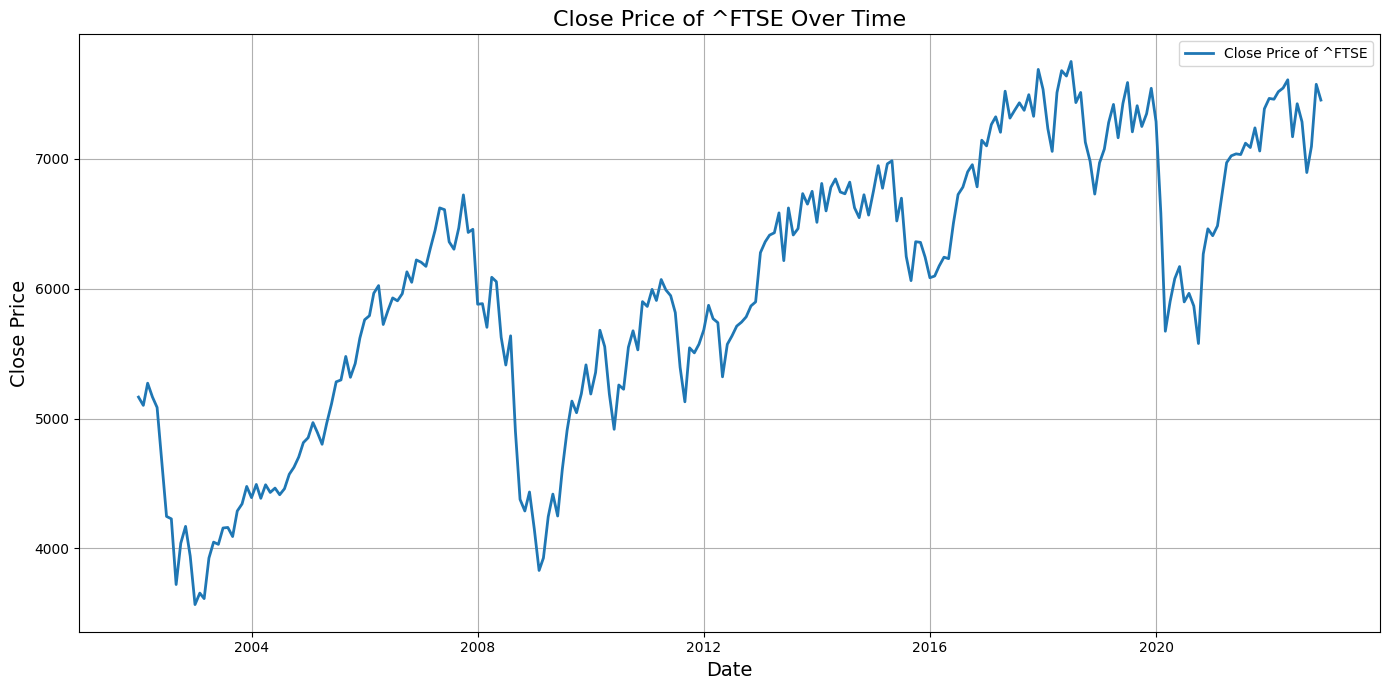

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbols and the time period
ticker_symbol_FTSE = ["^FTSE"]
start_date = "2002-01-01"
end_date = "2022-12-31"

# Download the stock data for each ticker symbol and visualize
for ticker in ticker_symbol_FTSE:
    try:
        # Downloading the data
        data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")

        # Check if data is not empty and index is valid (not delisted)
        if not data.empty and "No timezone found, symbol may be delisted" not in str(data.index):
            # Plotting
            plt.figure(figsize=(14, 7))  # Set figure size
            plt.plot(data.index, data['Close'], label=f'Close Price of {ticker}', linewidth=2)

            plt.title(f'Close Price of {ticker} Over Time', fontsize=16)
            plt.xlabel('Date', fontsize=14)
            plt.ylabel('Close Price', fontsize=14)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()  # Adjust layout

            # Display the plot
            plt.show()
        else:
            print(f"Data for {ticker} is empty or the ticker may be delisted, skipping.")
    except Exception as e:
        print(f"Failed to download data for {ticker}: {e}")


**FTSE Performance**

In [ ]:
import numpy as np

# Assuming `data` has already been fetched for 'UU.L' and is not empty
if not data.empty:

    # Calculate the annualized return
    # Note: The 'Adj Close' price accounts for dividends and splits.
    initial_price = data['Adj Close'].iloc[0]  # First available adjusted closing price
    final_price = data['Adj Close'].iloc[-1]  # Last available adjusted closing price
    total_years = (data.index[-1] - data.index[0]).days / 365.25  # Total duration in years

    # Total return calculation
    total_return = (final_price / initial_price) - 1

    # Annualized Return = (1 + Total Return)^(1/Total Years) - 1
    annualized_return = (1 + total_return) ** (1 / total_years) - 1
    # Calculate the daily returns
    daily_returns = data['Adj Close'].pct_change().dropna()

    # Annualized Volatility: standard deviation of daily returns scaled for the trading year
    annualized_volatility = np.std(daily_returns) * np.sqrt(252)  # Assuming 252 trading days in a year

    # Risk-Free Rate: assumption (e.g., 2.5% or another value based on current rates)
    risk_free_rate = 0.025

    # Sharpe Ratio: (Annualized Return - Risk-Free Rate) / Annualized Volatility
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

    # Print the calculated values
    print(f"Annualized Return for {ticker} from {start_date} to {end_date}: {annualized_return:.2%}")
    print(f"Annualized Volatility for {ticker}: {annualized_volatility:.2%}")
    print(f"Sharpe Ratio for {ticker}: {sharpe_ratio:.2f}")
else:
    print("Data is empty or the ticker may be delisted.")


# FTSE Components

Not the real FTSE performance on our time period (2002-2022) as components changed

Annualized Return for ^FTSE from 2002-01-01 to 2022-12-31: 1.77%
Annualized Volatility for ^FTSE: 62.21%
Sharpe Ratio for ^FTSE: -0.01


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

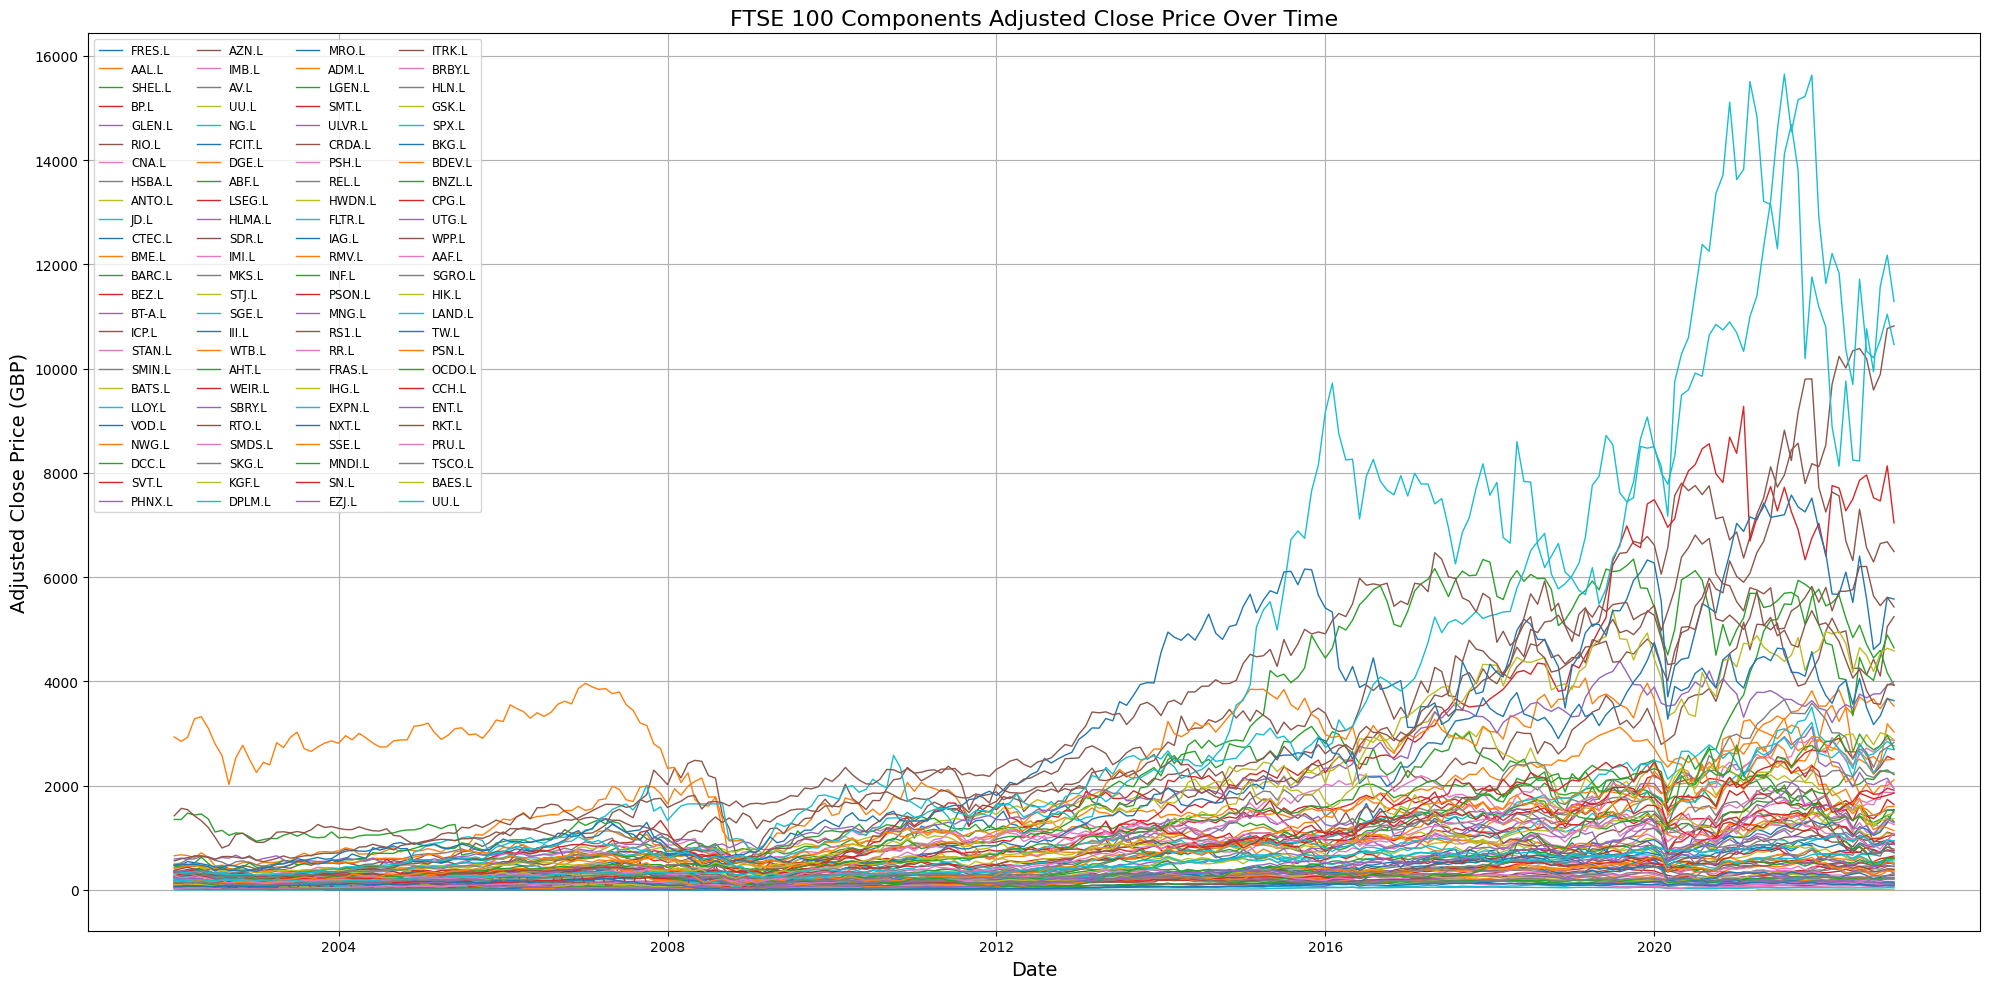

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define a long list of FTSE 100 component ticker symbols in the LSE format
ticker_symbols = [
    "FRES.L", "AAL.L", "SHEL.L", "BP.L", "GLEN.L", "RIO.L", "CNA.L", "HSBA.L",
    "ANTO.L", "JD.L", "CTEC.L", "BME.L", "BARC.L", "BEZ.L", "BT-A.L",
    "ICP.L", "STAN.L", "SMIN.L", "BATS.L", "LLOY.L", "VOD.L", "NWG.L", "DCC.L",
    "SVT.L", "PHNX.L", "AZN.L", "IMB.L", "AV.L", "UU.L", "NG.L", "FCIT.L", "DGE.L",
    "ABF.L", "LSEG.L", "HLMA.L", "SDR.L", "IMI.L", "MKS.L", "STJ.L", "SGE.L", "III.L",
    "WTB.L", "AHT.L", "WEIR.L", "SBRY.L", "RTO.L", "SMDS.L", "SKG.L", "KGF.L",
    "DPLM.L", "MRO.L", "ADM.L", "LGEN.L", "SMT.L", "ULVR.L", "CRDA.L", "PSH.L", "REL.L",
    "HWDN.L", "FLTR.L", "IAG.L", "RMV.L", "INF.L", "PSON.L", "MNG.L", "RS1.L", "RR.L",
    "FRAS.L", "IHG.L", "EXPN.L", "NXT.L", "SSE.L", "MNDI.L", "SN.L", "EZJ.L", "ITRK.L",
    "BRBY.L", "HLN.L", "GSK.L", "SPX.L", "BKG.L", "BDEV.L", "BNZL.L", "CPG.L", "UTG.L",
    "WPP.L", "AAF.L", "SGRO.L", "HIK.L", "LAND.L", "TW.L", "PSN.L", "OCDO.L", "CCH.L",
    "ENT.L", "RKT.L", "PRU.L", "TSCO.L", "BAES.L", "UU.L"
]

# Define the start and end dates for the historical data
start_date = "2002-01-01"
end_date = "2022-12-31"

# Initialize a figure for plotting
plt.figure(figsize=(20, 10))

# Iterate over the ticker symbols to download and plot their data
for ticker in ticker_symbols:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
        if not data.empty:
            plt.plot(data.index, data['Adj Close'], label=ticker, linewidth=1)
    except Exception as e:
        print(f"Failed to download data for {ticker}: {e}")

# Customizing the plot
plt.title('FTSE 100 Components Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price (GBP)', fontsize=14)
plt.legend(loc='upper left', fontsize='small', ncol=4)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


We can see that performance of our current FTSE100 components are very spread with some top performers and the main part remaining with relatively low performance on the long term. 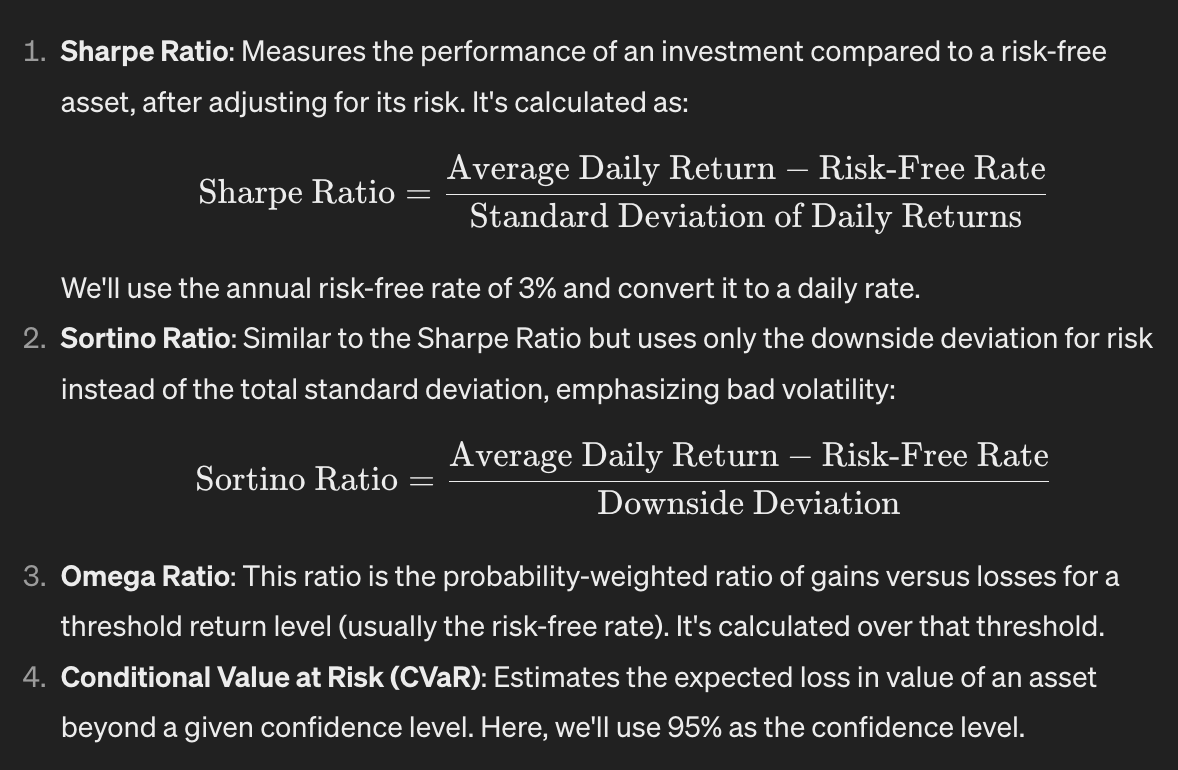

In [ ]:
import pandas as pd

# Initialize a list to collect DataFrames
data_frames = []

for ticker in ticker_symbols:
    try:
        # Download the data
        data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")

        # Check if the data DataFrame is not empty
        if not data.empty:
            # Add a 'Ticker' column to identify data from each ticker
            data['Ticker'] = ticker

            # Append the DataFrame to the list of DataFrames
            data_frames.append(data)

    except Exception as e:
        print(f"Failed to download data for {ticker}: {e}")

# Combine all DataFrames in the list into a single DataFrame
combined_data = pd.concat(data_frames)

# Reset index to include the Date in the DataFrame as a column
combined_data.reset_index(inplace=True)

# Save the combined data to a CSV file
combined_csv_path = "/content/ftse100_combined_data.csv"
combined_data.to_csv(combined_csv_path, index=False)

print(f"All ticker data combined and saved to {combined_csv_path}")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

All ticker data combined and saved to /content/ftse100_combined_data.csv


**Simulated VS Real FTSE Index**

[*********************100%%**********************]  1 of 1 completed


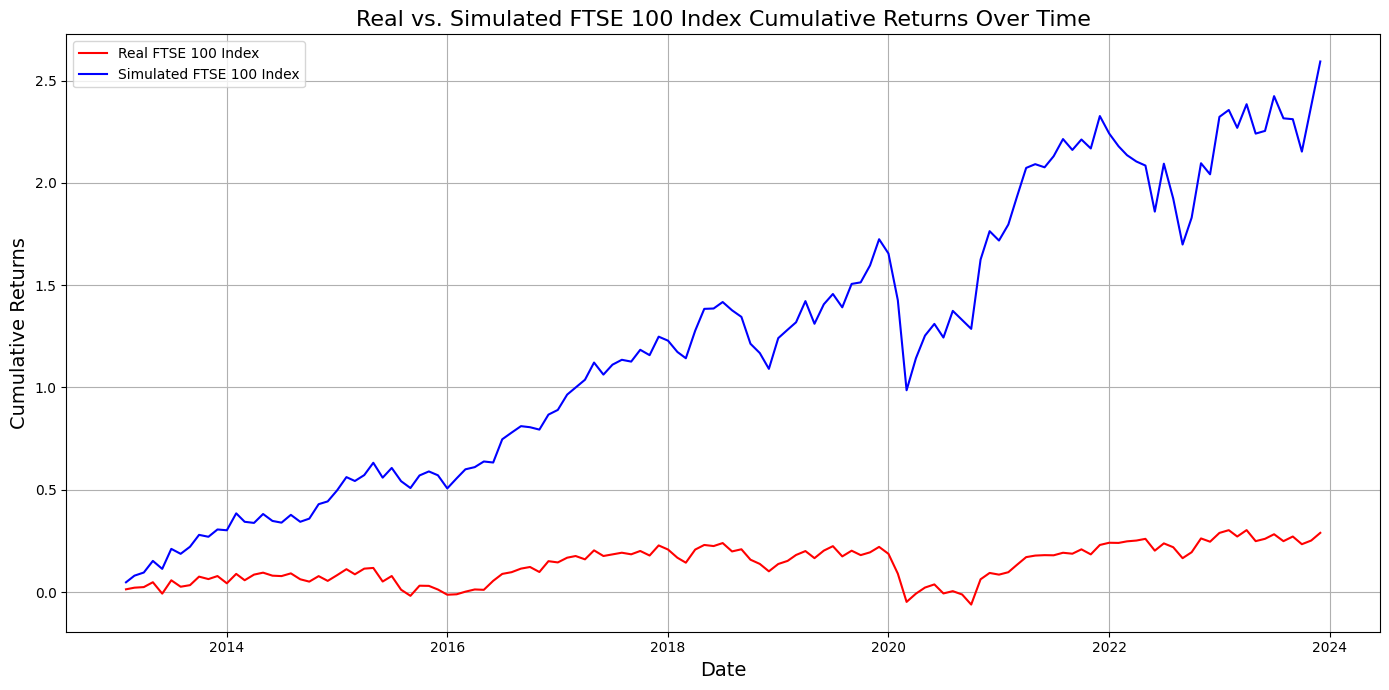

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the time period
start_date = "2013-01-01"
end_date = "2023-12-31"

# Fetch real FTSE 100 index data
real_ftse_data = yf.download("^FTSE", start=start_date, end=end_date, interval="1mo")['Adj Close']

# Initialize an empty DataFrame for storing adjusted close prices of all tickers
adj_close_prices = pd.DataFrame()

# Download and store adjusted close prices for each ticker symbol
for ticker in ticker_symbols:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, interval="1mo", progress=False)
        if not data.empty:
            adj_close_prices[ticker] = data['Adj Close']
    except Exception as e:
        print(f"Failed to download data for {ticker}: {e}")

# Assuming equal weighting, calculate the simulated FTSE 100 index's performance
adj_close_prices.dropna(axis=1, how='any', inplace=True)
weights = np.array([1/adj_close_prices.shape[1]] * adj_close_prices.shape[1])
daily_returns = adj_close_prices.pct_change()
portfolio_daily_returns = daily_returns.dot(weights)
cumulative_returns = (1 + portfolio_daily_returns).cumprod() - 1

# Calculate the annualized return of the simulated portfolio
annualized_return_portfolio = np.power(1 + cumulative_returns.iloc[-1], 1 / (len(adj_close_prices) / 12)) - 1

# Visualization of Real vs. Simulated FTSE 100 Index Performance
plt.figure(figsize=(14, 7))
plt.plot(real_ftse_data.index, real_ftse_data.pct_change().cumsum(), label='Real FTSE 100 Index', color='red')
plt.plot(cumulative_returns.index, cumulative_returns, label='Simulated FTSE 100 Index', color='blue')
plt.title('Real vs. Simulated FTSE 100 Index Cumulative Returns Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


By comparing the real FTSE100 with our reconstructed FTSE with its current components but applied to the last 10 years we notice a considerable difference in performance between the real one and our reconstructed. Note, this is due to the new components who drive most of the value.

The FTSE100 has opened itself to the world by focusing on its global reach and attracting overseas investors. In the last 10 years, the FTSE100 has seen some changes in its constituents, and the index remains today dominated by multinationals, most of which make a small fraction of their sales in the UK. The index is heavily weighted towards "the unpredictable: oils and miners; the indigestible: banks and insurers; the beyond-the-pale (at least so far as ESG screens are concerned): tobacco, oils, miners, bookmakers and defence stocks"

https://www.theguardian.com/business/nils-pratley-on-finance/2014/dec/29/ftse-100-world-of-changes-15-years-after-peak

**Highlighting the top performers YoY in the simulated index**

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

No data available for the year 2002
No data available for the year 2003
No data available for the year 2004
No data available for the year 2005
No data available for the year 2006
No data available for the year 2007


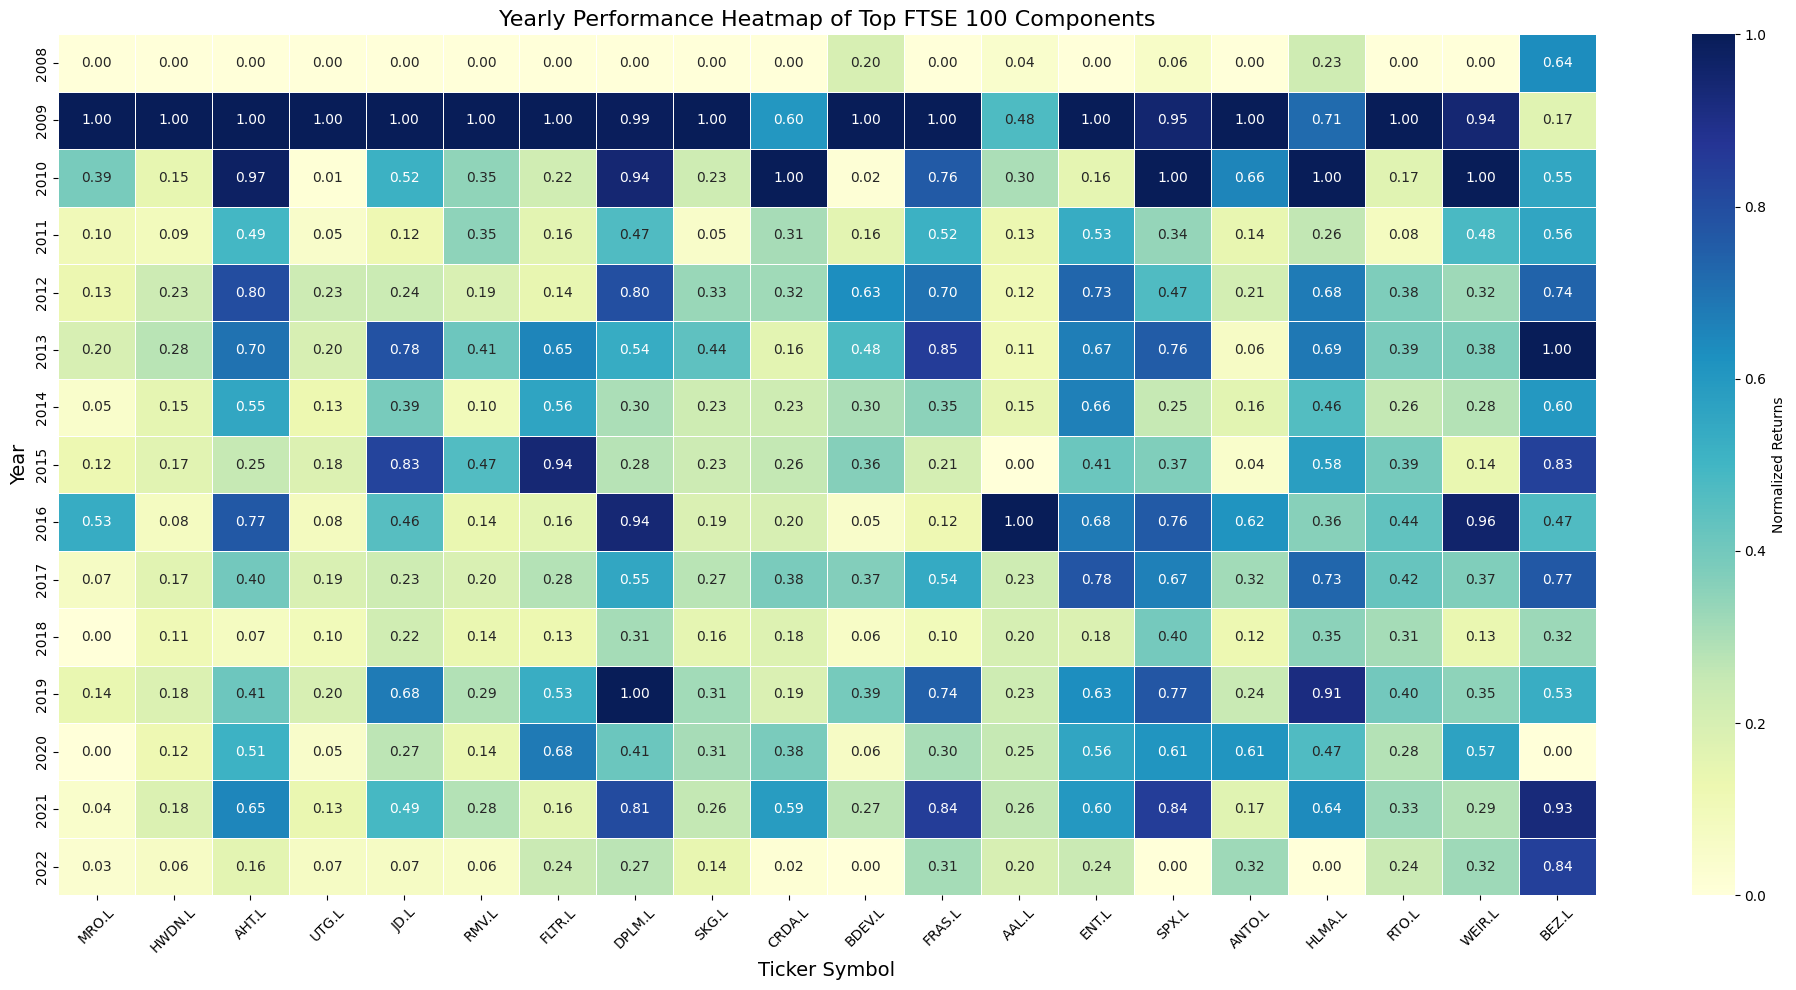

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns  # For the heatmap

# Define your start and end dates
start_date = "2002-01-01"
end_date = "2022-12-31"

# List of FTSE 100 ticker symbols
ticker_symbols = [
    "FRES.L", "AAL.L", "SHEL.L", "BP.L", "GLEN.L", "RIO.L", "CNA.L", "HSBA.L",
    "ANTO.L", "JD.L", "CTEC.L", "BME.L", "BARC.L", "BEZ.L", "BT-A.L",
    "ICP.L", "STAN.L", "SMIN.L", "BATS.L", "LLOY.L", "VOD.L", "NWG.L", "DCC.L",
    "SVT.L", "PHNX.L", "AZN.L", "IMB.L", "AV.L", "UU.L", "NG.L", "FCIT.L", "DGE.L",
    "ABF.L", "LSEG.L", "HLMA.L", "SDR.L", "IMI.L", "MKS.L", "STJ.L", "SGE.L", "III.L",
    "WTB.L", "AHT.L", "WEIR.L", "SBRY.L", "RTO.L", "SMDS.L", "SKG.L", "KGF.L",
    "DPLM.L", "MRO.L", "ADM.L", "LGEN.L", "SMT.L", "ULVR.L", "CRDA.L", "PSH.L", "REL.L",
    "HWDN.L", "FLTR.L", "IAG.L", "RMV.L", "INF.L", "PSON.L", "MNG.L", "RS1.L", "RR.L",
    "FRAS.L", "IHG.L", "EXPN.L", "NXT.L", "SSE.L", "MNDI.L", "SN.L", "EZJ.L", "ITRK.L",
    "BRBY.L", "HLN.L", "GSK.L", "SPX.L", "BKG.L", "BDEV.L", "BNZL.L", "CPG.L", "UTG.L",
    "WPP.L", "AAF.L", "SGRO.L", "HIK.L", "LAND.L", "TW.L", "PSN.L", "OCDO.L", "CCH.L",
    "ENT.L", "RKT.L", "PRU.L", "TSCO.L", "BAES.L"
]

# Initialize DataFrame to hold adjusted close prices
adj_close_prices = pd.DataFrame()

# Fetch adjusted close prices for each ticker
for ticker in ticker_symbols:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")['Adj Close']
        adj_close_prices[ticker] = data
    except Exception as e:
        print(f"Failed to download {ticker}: {e}")

# Ensure all stocks have data for the whole period
adj_close_prices.dropna(axis=1, how='any', inplace=True)

# Prepare a DataFrame to store yearly returns for each component
yearly_returns = pd.DataFrame()

# Loop through each year in your DataFrame
for year in range(int(start_date[:4]), int(end_date[:4]) + 1):
    start_of_year = f"{year}-01-01"
    end_of_year = f"{year}-12-31"
    yearly_data = adj_close_prices.loc[start_of_year:end_of_year]

    if not yearly_data.empty:
        yearly_return = (yearly_data.iloc[-1] / yearly_data.iloc[0]) - 1
        yearly_returns[year] = yearly_return
    else:
        print(f"No data available for the year {year}")


# Transpose to align stocks as columns
yearly_returns = yearly_returns.T

# Calculate the average returns and select top performers
average_returns = yearly_returns.mean()
top_performers = average_returns.nlargest(20).index  # Adjust the number to select
filtered_returns = yearly_returns[top_performers]

# Normalize the returns for visualization
normalized_filtered_returns = (filtered_returns - filtered_returns.min()) / (filtered_returns.max() - filtered_returns.min())

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(normalized_filtered_returns, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Normalized Returns'})
plt.title('Yearly Performance Heatmap of Top FTSE 100 Components', fontsize=16)
plt.xlabel('Ticker Symbol', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Print top 5 performers for each year
for year, returns in yearly_returns.iterrows():
    top_performers = returns.nlargest(5)
    print(f"Top performers in {year}:")
    print(top_performers)
    print()



Top performers in 2013:
OCDO.L    3.173913
JD.L      1.008464
IAG.L     0.887165
HWDN.L    0.863567
FRAS.L    0.811502
Name: 2013, dtype: float64

Top performers in 2014:
HIK.L     0.652557
FLTR.L    0.571612
AHT.L     0.478543
ENT.L     0.448809
SN.L      0.381672
Name: 2014, dtype: float64

Top performers in 2015:
FLTR.L    1.240621
JD.L      1.087099
RMV.L     0.794031
DCC.L     0.630927
TW.L      0.579493
Name: 2015, dtype: float64

Top performers in 2016:
AAL.L     3.180934
MRO.L     2.576277
GLEN.L    2.099576
RS1.L     1.339220
WEIR.L    1.264201
Name: 2016, dtype: float64

Top performers in 2017:
ICP.L     0.692073
EZJ.L     0.631151
ENT.L     0.611098
OCDO.L    0.592221
BKG.L     0.564599
Name: 2017, dtype: float64

Top performers in 2018:
HIK.L     0.807083
OCDO.L    0.568705
PSON.L    0.383056
AZN.L     0.250353
GSK.L     0.208693
Name: 2018, dtype: float64

Top performers in 2019:
JD.L      0.814523
LSEG.L    0.711713
FRAS.L    0.648454
ICP.L     0.626758
DPLM.L    0.620342

**On the last 10 years**

2013: OCDO.L (Ocado Group) exhibited exceptional performance with a return of 3.173913, followed by JD.L (JD Sports Fashion) and IAG.L (International Consolidated Airlines Group).

2014: HIK.L (Hikma Pharmaceuticals) led the pack in 2014 with a return of 0.652557, followed by FLTR.L (Flutter Entertainment) and AHT.L (Ashtead Group).

2015: FLTR.L continued its strong performance from the previous year, securing the top spot with a return of 1.240621, followed by JD.L and RMV.L (Rightmove).

2016: AAL.L (Anglo American) emerged as the top performer in 2016 with a remarkable return of 3.180934, followed by MRO.L (Melrose Industries) and GLEN.L (Glencore).

2017: ICP.L (Intermediate Capital Group) led the pack in 2017 with a return of 0.692073, followed by EZJ.L (easyJet) and ENT.L (Entain).

2018: HIK.L once again claimed the top spot in 2018 with a return of 0.807084, followed by OCDO.L and PSON.L (Pearson).

2019: JD.L led the pack in 2019 with a return of 0.814523, followed by LSEG.L (London Stock Exchange Group) and FRAS.L (Frasers Group).

2020: SMT.L (Scottish Mortgage Investment Trust) exhibited strong performance in 2020 with a return of 1.097697, followed by OCDO.L and FLTR.L.

2021: FRAS.L (Frasers Group) emerged as the top performer in 2021 with a return of 0.804775, followed by MKS.L (Marks & Spencer) and CRDA.L (Croda International).

2022: PSON.L (Pearson) led the pack in 2022 with a return of 0.566596, followed by GLEN.L (Glencore) and FRES.L (Fresnillo).

2023: RR.L (Rolls-Royce Holdings) exhibited exceptional performance in 2023 with a return of 1.834311, followed by MRO.L and MKS.L.

# FTSE Components Standard Optimization without ESG

To optimize the stocks based on Value at Risk (VaR) and Expected Shortfall (ES, also known as Conditional Value at Risk or CVaR), we need to take several steps. First, we'll calculate the historical returns of each stock. Then, we'll use a portfolio optimization method that minimizes the portfolio's VaR or ES, considering the correlation between stocks to diversify risk effectively. This approach will involve estimating the covariance matrix of stock returns, which is essential for both VaR and ES calculations.

We will build upon our previous code by first converting prices to returns, then applying an optimization algorithm. Python's scipy.optimize module can be used for the optimization, but for financial-specific measures like VaR and ES, we might need additional libraries such as cvxpy, which is more suited for convex optimization problems.

Recap:


*   Calculate daily returns from the adjusted close prices.

*   Estimate the covariance matrix for the returns.

*   Define the optimization problem:

Objective: Minimize the portfolio's VaR or ES.
Constraints: Sum of portfolio weights equals 1 (fully invested portfolio), and weights are greater than or equal to 0 (no short selling).

*   Solve the optimization problem.

*   Analyze the optimal portfolio weights.




This code snippet below calculates and collects the adjusted close prices for each stock in your list, stores them in a DataFrame (adj_close_prices), and then calculates the daily returns (daily_returns).
It uses the pct_change() method to calculate daily returns from the adjusted close prices.
The cov() method on the daily_returns DataFrame computes the covariance matrix of the returns, which is essential for portfolio optimization.
Be aware that downloading a large number of stocks over a long period can take some time. Additionally, the presence of NaN values can cause issues in calculations, so the code uses dropna() to remove any rows with NaN values.
This setup assumes that the stocks will have data available for the same dates. If not, dropna() will remove any days where at least one stock doesn't have data, potentially reducing the dataset significantly. Depending on your analysis, you might need a more sophisticated method for handling missing data.

In [ ]:
import numpy as np
import pandas as pd
import cvxpy as cp
import scipy.stats as stats
import yfinance as yf

# Define ticker symbols and date range
ticker_symbols = [
    "FRES.L", "AAL.L", "SHEL.L", "BP.L", "GLEN.L", "RIO.L", "CNA.L", "HSBA.L",
    "ANTO.L", "JD.L", "CTEC.L", "BME.L", "BARC.L", "BEZ.L", "BT-A.L",
    "ICP.L", "STAN.L", "SMIN.L", "BATS.L", "LLOY.L", "VOD.L", "NWG.L", "DCC.L",
    "SVT.L", "PHNX.L", "AZN.L", "IMB.L", "AV.L", "UU.L", "NG.L", "FCIT.L", "DGE.L",
    "ABF.L", "LSEG.L", "HLMA.L", "SDR.L", "IMI.L", "MKS.L", "STJ.L", "SGE.L", "III.L",
    "WTB.L", "AHT.L", "WEIR.L", "SBRY.L", "RTO.L", "SMDS.L", "SKG.L", "KGF.L",
    "DPLM.L", "MRO.L", "ADM.L", "LGEN.L", "SMT.L", "ULVR.L", "CRDA.L", "PSH.L", "REL.L",
    "HWDN.L", "FLTR.L", "IAG.L", "RMV.L", "INF.L", "PSON.L", "MNG.L", "RS1.L", "RR.L",
    "FRAS.L", "IHG.L", "EXPN.L", "NXT.L", "SSE.L", "MNDI.L", "SN.L", "EZJ.L", "ITRK.L",
    "BRBY.L", "HLN.L", "GSK.L", "SPX.L", "BKG.L", "BDEV.L", "BNZL.L", "CPG.L", "UTG.L",
    "WPP.L", "AAF.L", "SGRO.L", "HIK.L", "LAND.L", "TW.L", "PSN.L", "OCDO.L", "CCH.L",
    "ENT.L", "RKT.L", "PRU.L", "TSCO.L", "BAES.L", "UU.L"
]
start_date = "2021-01-01"
end_date = "2022-12-31"

# Pre-fetch data in a list, then concatenate all at once
data_frames = []
for ticker in ticker_symbols:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, interval="1d")['Adj Close']
        data_frames.append(data.rename(ticker))
    except Exception as e:
        print(f"Failed to download {ticker}: {e}")

adj_close_prices = pd.concat(data_frames, axis=1)

# Calculate daily returns and covariance matrix
daily_returns = adj_close_prices.pct_change().dropna()
covariance_matrix = daily_returns.cov()

# Setup for optimization
n = len(ticker_symbols)
weights = cp.Variable(n)

# Portfolio variance
portfolio_variance = cp.quad_form(weights, covariance_matrix.values)

# Optimization objective: Minimize portfolio variance
objective = cp.Minimize(portfolio_variance)

# Constraints: weights sum to 1, weights are non-negative
constraints = [cp.sum(weights) == 1, weights >= 0]

# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract and display the optimal portfolio weights
optimal_weights_without_esg = weights.value
print("Optimal Portfolio Weights:\n", optimal_weights_without_esg)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Optimal Portfolio Weights:
 [ 8.58035347e-19 -1.05384453e-18  8.54391574e-02 -2.29854820e-18
  2.66077615e-18  3.00202062e-02 -9.18065423e-19  6.16597804e-18
  4.15483274e-18 -2.74056273e-18  5.98273504e-18 -5.66189876e-18
  6.28751014e-19 -4.23515652e-18  2.11498208e-18 -8.61467923e-19
  3.12752482e-18  1.80216209e-18 -2.67789706e-18  3.88221651e-18
  1.88670122e-18  3.47524532e-18  1.33130605e-19  2.10727074e-18
 -1.52451288e-18  2.58018220e-18  1.27921479e-01  2.79476585e-02
  2.43586870e-18  3.47593424e-18  1.50337700e-03 -3.77265518e-19
 -4.67280203e-18  4.34883382e-02  3.74599895e-19  9.71257290e-03
 -1.31432017e-18 -4.28507129e-18  2.02375434e-18  6.49164349e-20
  8.17820173e-21  7.40529731e-19  3.64665596e-18  1.44587717e-18
 -3.49904884e-18  6.44030909e-02  1.84985340e-18 -2.64063984e-19
  3.09458914e-03  1.71965073e-18 -4.06309338e-18 -1.33789926e-18
  9.83878476e-19  7.88670653e-03  6.71074483e-02 -2.06172542e-18
  4.00738252e-02  1.25771239e-18 -1.26737540e-18  1.38440849e-

**Performance**

In [ ]:
# Calculate daily returns for the optimized portfolio
optimized_daily_returns = np.dot(daily_returns, optimal_weights_without_esg)

# Assuming equal weighting for the non-optimized portfolio for comparison
equal_weights = np.repeat(1/n, n)
non_optimized_daily_returns = np.dot(daily_returns, equal_weights)

# Calculate cumulative returns for both portfolios
optimized_cumulative_returns = (1 + pd.Series(optimized_daily_returns, index=daily_returns.index)).cumprod()
non_optimized_cumulative_returns = (1 + pd.Series(non_optimized_daily_returns, index=daily_returns.index)).cumprod()


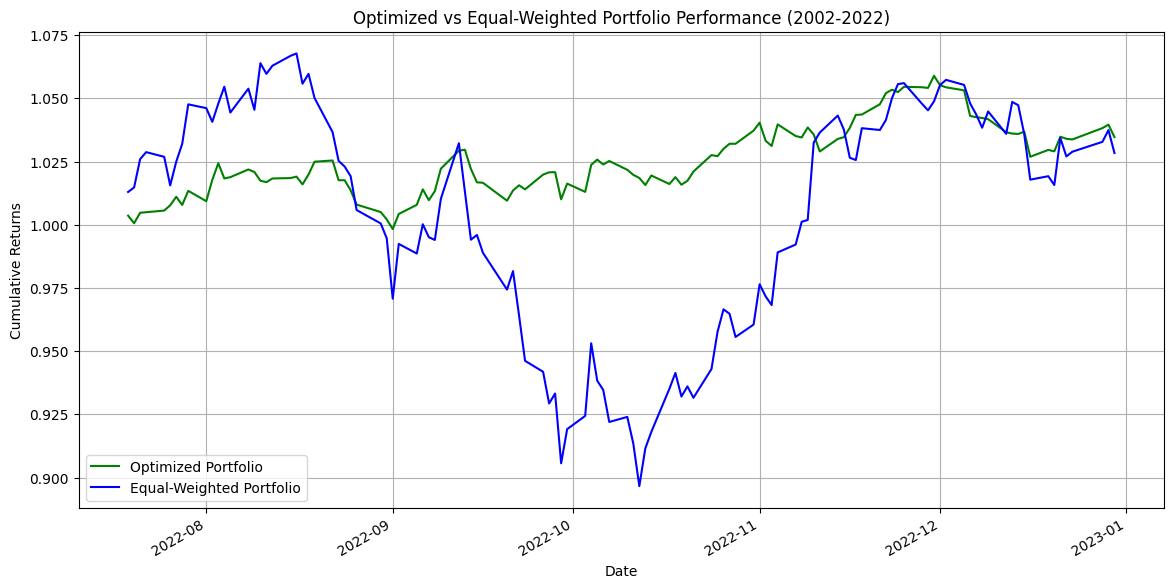

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
optimized_cumulative_returns.plot(label='Optimized Portfolio', color='green')
non_optimized_cumulative_returns.plot(label='Equal-Weighted Portfolio', color='blue')
plt.title('Optimized vs Equal-Weighted Portfolio Performance (2002-2022)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Annualize the returns
years = (daily_returns.index[-1] - daily_returns.index[0]).days / 365.25
annualized_return_optimized = (optimized_cumulative_returns.iloc[-1]) ** (1/years) - 1
annualized_return_non_optimized = (non_optimized_cumulative_returns.iloc[-1]) ** (1/years) - 1

print(f"Annualized Return for the Optimized Portfolio: {annualized_return_optimized:.2%}")
print(f"Annualized Return for the Equal-Weighted Portfolio: {annualized_return_non_optimized:.2%}")


Annualized Return for the Optimized Portfolio: 7.89%
Annualized Return for the Equal-Weighted Portfolio: 6.43%


On the last year, as shown in the chart, the optimized portfolio using optimisation outperformed the equal-weighted portfolio.

# Determine the impact of ESG investing on ES-optimal portfolios (one year)

* Define the ESG Scoring System: Decide how the ESG scores (or grades) will influence the portfolio weights. For example, higher ESG scores could lead to a higher weight in the portfolio.
* Calculate Yearly ESG-Influenced Weights: Based on the chosen scoring system, calculate new portfolio weights for each year.
* Rebalance Portfolio Annually: Adjust the portfolio annually according to the new weights, and track the performance over time.
* Compare Performance: Analyze and compare the performance of the ESG-influenced portfolio against the non-ESG optimized portfolio.

In [ ]:
# Let's start by loading the uploaded Excel file to understand its structure and how the ESG scores are displayed.
import pandas as pd

# Load the Excel file
esg_scores_path = '/content/ESG Scores & E Scores FTSE100_0304zpx.xlsx'
esg_data = pd.read_excel(esg_scores_path, sheet_name=None)

# Preview the sheet names and the first few rows of each sheet to understand the data layout
sheet_previews = {sheet_name: data.head() for sheet_name, data in esg_data.items()}
sheet_previews


{'Ark1':                 Name     RIC ESG Grade - 2022  ESG Scores - 2022  \
 0          Shell PLC  SHEL.L               A+              93.46   
 1    AstraZeneca PLC   AZN.L               A+              95.57   
 2  HSBC Holdings PLC  HSBA.L               A-              76.99   
 3       Unilever PLC  ULVR.L                A              88.94   
 4      Rio Tinto PLC   RIO.L               B+              70.57   
 
   ESG Grade - 2021  ESG Scores - 2021 ESG Grade - 2020  ESG Scores - 2020  \
 0               A+              92.82               A+              94.19   
 1               A+              95.71               A+              95.18   
 2               A-              78.79               A-              80.83   
 3                A              89.93                A              89.76   
 4               A-              75.22               A-              79.81   
 
   ESG Grade - 2019  ESG Scores - 2019  ... E Grade - 2006  E scores - 2006  \
 0                A        

In [ ]:
import pandas as pd

# Load the Excel file
esg_scores_path = '/content/ESG Scores & E Scores FTSE100_0304zpx.xlsx'
esg_data = pd.read_excel(esg_scores_path, sheet_name='Ark1')  # Assuming all data is in "Ark1" for this example

# Initialize the dictionary to store scores
esg_scores_for_tickers = {}

# Iterate through each column
for col in esg_data.columns:
    if "ESG Scores -" in col:
        year = col.split('-')[-1].strip()  # Extract year
        if year not in esg_scores_for_tickers:
            esg_scores_for_tickers[year] = {}
        for index, row in esg_data.iterrows():
            ticker = row['RIC']
            score = row[col]
            # Check if score is NaN and replace with 0
            score = 0 if pd.isna(score) else score
            esg_scores_for_tickers[year][ticker] = score

esg_scores_for_tickers



{'2022': {'SHEL.L': 93.46,
  'AZN.L': 95.57,
  'HSBA.L': 76.99,
  'ULVR.L': 88.94,
  'RIO.L': 70.57,
  'BP.L': 87.21,
  'GSK.L': 91.49,
  'DGE.L': 76.8,
  'REL.L': 81.3,
  'GLEN.L': 89.27,
  'BATS.L': 89.49,
  'LSEG.L': 67.29,
  'BAES.L': 69.4,
  'NG.L': 70.95,
  'CPG.L': 71.46,
  'RR.L': 0,
  'LLOY.L': 84.92,
  'EXPN.L': 65.91,
  'RKT.L': 83.47,
  'HLN.L': 60.73,
  'BARC.L': 84.22,
  'FLTR.L': 64.19,
  'AAL.L': 78.0,
  'III.L': 75.95,
  'AHT.L': 48.16,
  'NWG.L': 79.18,
  'TSCO.L': 79.75,
  'ANTO.L': 77.52,
  'PRU.L': 74.56,
  'VOD.L': 87.83,
  'ABF.L': 69.26,
  'SSE.L': 79.95,
  'STAN.L': 88.83,
  'IMB.L': 81.11,
  'LGEN.L': 78.28,
  'AV.L': 72.94,
  'IHG.L': 77.3,
  'SGE.L': 52.55,
  'SMT.L': 11.96,
  'RTO.L': 77.56,
  'SGRO.L': 76.83,
  'NXT.L': 70.53,
  'INF.L': 67.08,
  'BT-A.L': 65.76,
  'BNZL.L': 47.97,
  'SKG.L': 81.51,
  'CCH.L': 87.59,
  'HLMA.L': 61.48,
  'MRO.L': 66.74,
  'IAG.L': 72.45,
  'SN.L': 78.46,
  'ADM.L': 56.1,
  'PSH.L': 36.03,
  'ITRK.L': 78.59,
  'WPP.L': 72.5

In [ ]:
# Convert the nested dictionary to a DataFrame
esg_scores_df = pd.DataFrame(esg_scores_for_tickers).reset_index().rename(columns={'index': 'Ticker'})

# Reordering the DataFrame to have 'Ticker' column first if needed
cols = esg_scores_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
esg_scores_df = esg_scores_df[cols]

# Save the DataFrame to a CSV file
csv_file_path = '/content/esg_scores.csv'  # Define your path where you want to save the CSV
esg_scores_df.to_csv(csv_file_path, index=False)

print(f'ESG scores saved to {csv_file_path}')


ESG scores saved to /content/esg_scores.csv


In [ ]:
import pandas as pd
import numpy as np

# Assuming esg_scores_dict is the dictionary with ESG scores for each RIC
# Load the Excel file with ESG scores
esg_scores_path = '/content/ESG Scores & E Scores FTSE100_0304zpx.xlsx'
esg_data = pd.read_excel(esg_scores_path, sheet_name=None)
esg_scores = esg_data['Ark1'].filter(regex='RIC|ESG Scores - 20[0-2][0-9]')
esg_scores_dict = esg_scores.set_index('RIC').T.to_dict('dict')

# Your list of ticker symbols
ticker_symbols = [
    "FRES.L", "AAL.L", "SHEL.L", "BP.L", "GLEN.L", "RIO.L", "CNA.L", "HSBA.L",
    "ANTO.L", "JD.L", "CTEC.L", "BME.L", "BARC.L", "BEZ.L", "BT-A.L",
    "ICP.L", "STAN.L", "SMIN.L", "BATS.L", "LLOY.L", "VOD.L", "NWG.L", "DCC.L",
    "SVT.L", "PHNX.L", "AZN.L", "IMB.L", "AV.L", "UU.L", "NG.L", "FCIT.L", "DGE.L",
    "ABF.L", "LSEG.L", "HLMA.L", "SDR.L", "IMI.L", "MKS.L", "STJ.L", "SGE.L", "III.L",
    "WTB.L", "AHT.L", "WEIR.L", "SBRY.L", "RTO.L", "SMDS.L", "SKG.L", "KGF.L",
    "DPLM.L", "MRO.L", "ADM.L", "LGEN.L", "SMT.L", "ULVR.L", "CRDA.L", "PSH.L", "REL.L",
    "HWDN.L", "FLTR.L", "IAG.L", "RMV.L", "INF.L", "PSON.L", "MNG.L", "RS1.L", "RR.L",
    "FRAS.L", "IHG.L", "EXPN.L", "NXT.L", "SSE.L", "MNDI.L", "SN.L", "EZJ.L", "ITRK.L",
    "BRBY.L", "HLN.L", "GSK.L", "SPX.L", "BKG.L", "BDEV.L", "BNZL.L", "CPG.L", "UTG.L",
    "WPP.L", "AAF.L", "SGRO.L", "HIK.L", "LAND.L", "TW.L", "PSN.L", "OCDO.L", "CCH.L",
    "ENT.L", "RKT.L", "PRU.L", "TSCO.L", "BAES.L", "UU.L"
]

# Initialize a dictionary to hold ESG scores for tickers found
esg_scores_for_tickers = {}

# Loop through each ticker to find and store its ESG scores
for ticker in ticker_symbols:
    if ticker in esg_scores_dict:
        # Ticker found in the ESG scores dictionary
        esg_scores_for_tickers[ticker] = esg_scores_dict[ticker]
    else:
        # Ticker not found, handle accordingly (e.g., print a message or use default values)
        print(f"ESG scores for ticker {ticker} not found.")

# Verify that tickers match and have corresponding ESG scores
missing_tickers = set(ticker_symbols) - set(esg_scores_for_tickers.keys())
if missing_tickers:
    print(f"Missing ESG scores for tickers: {missing_tickers}")
else:
    print("All tickers matched with ESG scores.")



All tickers matched with ESG scores.


* Define the ESG Scoring System: We'll use the "ESG Scores" directly to adjust portfolio weights. Higher ESG scores will result in higher weights, but the exact method of conversion from score to weight needs to be defined. For simplicity, let's normalize the ESG scores for each year to sum up to 1, similar to portfolio weights.

* Calculate Yearly ESG-Influenced Weights: For each year, adjust the portfolio weights based on the normalized ESG scores.

* Rebalance Portfolio Annually: Use the adjusted weights to simulate portfolio rebalancing at the start of each year, tracking the portfolio's performance over time.

* Compare Performance: Analyze the impact of ESG scoring on the portfolio's performance compared to the non-ESG-optimized portfolio.

In [ ]:
import numpy as np
import pandas as pd
import cvxpy as cp
import yfinance as yf

# Assuming 'daily_returns' and 'esg_scores_for_tickers' are already defined

# Check and clean expected returns
expected_returns = daily_returns.mean().values
if np.isnan(expected_returns).any():
    print("NaN values found in expected returns. Consider cleaning the data.")

# Prepare ESG scores, handling NaN values
esg_scores_2022 = np.array([esg_scores_for_tickers.get(ticker, {}).get('ESG Scores - 2022', np.nan) for ticker in ticker_symbols])
if np.isnan(esg_scores_2022).any():
    # Strategy for handling NaN values in ESG scores (e.g., assigning mean score)
    mean_esg_score = np.nanmean(esg_scores_2022)
    esg_scores_2022 = np.nan_to_num(esg_scores_2022, nan=mean_esg_score)

# Normalize ESG scores
max_esg_score = np.max(esg_scores_2022)
normalized_esg_scores = esg_scores_2022 / max_esg_score

# Define variables and problem setup
n = len(ticker_symbols)
weights = cp.Variable(n)
portfolio_return = cp.sum(cp.multiply(expected_returns, weights))
portfolio_esg_score = cp.sum(cp.multiply(normalized_esg_scores, weights))

lambda_return = 0.5  # Balance factor for returns
lambda_esg = 0.5     # Balance factor for ESG scores
alpha = 0.95  # Confidence level for CVaR
cvar = cp.sum(cp.pos(-portfolio_return - portfolio_esg_score) * (1 / (1 - alpha))) / n  # CVaR calculation
lambda_cvar = 0.2  # Balance factor for CVaR

# Objective: Maximize a weighted sum of return, ESG score, and minimize CVaR
objective = cp.Maximize(lambda_return * portfolio_return + lambda_esg * portfolio_esg_score - lambda_cvar * cvar)


# Constraints including a max weight per asset to encourage diversification
max_weight_per_asset = 0.5  # Adjust this value as needed
constraints = [
    cp.sum(weights) == 1,  # Weights sum to 1
    weights >= 0,  # No short selling
    weights <= max_weight_per_asset  # Max weight per asset to prevent concentration
]

# Problem and Solver
problem = cp.Problem(objective, constraints)

# Try solving with adjusted parameters or different solver if needed
try:
    problem.solve(solver=cp.OSQP, verbose=True, max_iter=20000, eps_abs=1e-4, eps_rel=1e-4)
    optimal_weights_with_esg = weights.value
    print("Optimal Portfolio Weights ESG :\n", optimal_weights_with_esg)
except cp.SolverError:
    print("OSQP failed to converge, trying with SCS solver.")
    problem.solve(solver=cp.SCS, verbose=True)
    optimal_weights_with_esg = weights.value
    print("Optimal Portfolio Weights ESG with SCS:\n", optimal_weights_with_esg)



                                     CVXPY                                     
                                     v1.3.3                                    
(CVXPY) Apr 15 11:09:29 AM: Your problem has 100 variables, 3 constraints, and 0 parameters.
(CVXPY) Apr 15 11:09:29 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 15 11:09:29 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 15 11:09:29 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 15 11:09:29 AM: Compiling problem (target solver=OSQP).
(CVXPY) Apr 15 11:09:29 AM: Reduction chain: FlipObjective -> CvxAttr2Constr -> Qp2SymbolicQp -

In this code snippet we perform portfolio optimization by maximizing a weighted sum of expected return, ESG score, and minimizing Conditional Value at Risk (CVaR).

1. **Data Preparation**:
   - It assumes that 'daily_returns' (presumably the historical returns of assets) and 'esg_scores_for_tickers' (presumably the ESG scores for the assets)

2. **Expected Returns and ESG Scores**:
   - It calculates the expected returns of assets based on historical data.
   - It handles NaN values in ESG scores by either replacing them with the mean score or using a specified strategy.

3. **Normalization**:
   - ESG scores for the year 2022 are normalized to a scale of 0 to 1.

4. **Problem Setup**:
   - It defines variables for optimization, such as the number of assets and weight of each asset.
   - It calculates the portfolio's expected return and ESG score based on the asset weights.

5. **Objective Function**:
   - The objective is to maximize a weighted sum of expected return and ESG score while minimizing CVaR.
   - CVaR is calculated as a measure of the portfolio's risk beyond a certain confidence level.

6. **Constraints**:
   - Constraints ensure that the weights sum up to 1, prevent short selling, and limit the maximum weight per asset to encourage diversification.

7. **Solver Selection**:
   - It attempts to solve the optimization problem using the OSQP solver.
   - If OSQP fails to converge, it falls back to the SCS solver.

8. **Output**:
   - The solver's output provides the optimal portfolio weights considering both expected return and ESG score, along with the optimization process details like iterations and objective value.

The solver successfully converged and found the optimal portfolio weights, as indicated by the "Problem status: optimal" message. The optimal portfolio weights are printed out as an array named "Optimal Portfolio Weights ESG".

Each value in the array represents the weight assigned to the corresponding asset in the portfolio. These weights determine the allocation of capital across assets, aiming to achieve the specified objectives of maximizing return, maximizing ESG score, and minimizing CVaR.

Annualized Return with ESG: 0.2220
Annualized Return without ESG: 0.0775
Annualized Return Not Optimized: 0.0632


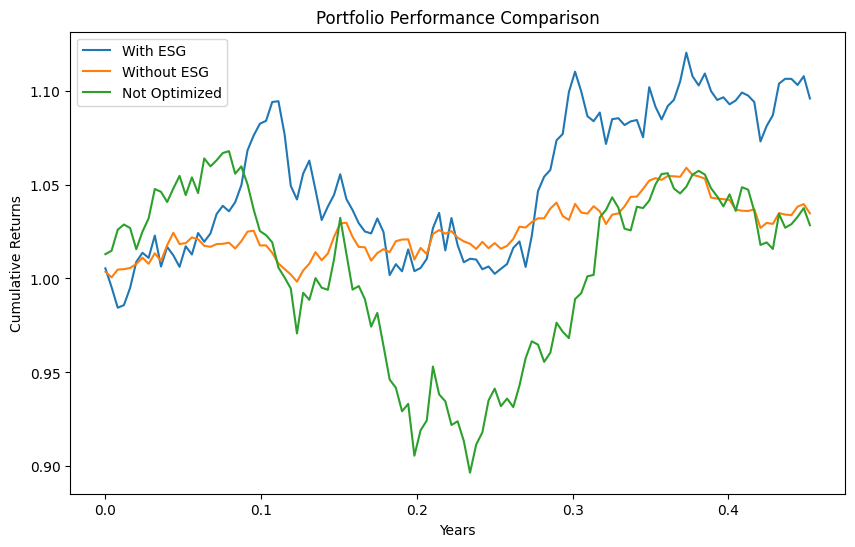

In [ ]:
import matplotlib.pyplot as plt

# Given daily returns data
# Note: Make sure 'daily_returns' is defined and contains the daily returns of the assets in your portfolio

# Calculate portfolio daily returns
portfolio_daily_returns_with_esg = daily_returns.dot(optimal_weights_with_esg)
portfolio_daily_returns_without_esg = daily_returns.dot(optimal_weights_without_esg)

# Assuming equally weighted portfolio for the not optimized scenario
equal_weights = np.ones(n) / n
portfolio_daily_returns_not_optimized = daily_returns.dot(equal_weights)

# Calculate annualized returns
annualized_return_with_esg = np.prod(1 + portfolio_daily_returns_with_esg)**(252/len(portfolio_daily_returns_with_esg)) - 1
annualized_return_without_esg = np.prod(1 + portfolio_daily_returns_without_esg)**(252/len(portfolio_daily_returns_without_esg)) - 1
annualized_return_not_optimized = np.prod(1 + portfolio_daily_returns_not_optimized)**(252/len(portfolio_daily_returns_not_optimized)) - 1

# Print annualized returns
print(f"Annualized Return with ESG: {annualized_return_with_esg:.4f}")
print(f"Annualized Return without ESG: {annualized_return_without_esg:.4f}")
print(f"Annualized Return Not Optimized: {annualized_return_not_optimized:.4f}")

# Plotting
years = np.arange(len(portfolio_daily_returns_with_esg)) / 252
plt.figure(figsize=(10, 6))
plt.plot(years, np.cumprod(1 + portfolio_daily_returns_with_esg), label='With ESG')
plt.plot(years, np.cumprod(1 + portfolio_daily_returns_without_esg), label='Without ESG')
plt.plot(years, np.cumprod(1 + portfolio_daily_returns_not_optimized), label='Not Optimized')
plt.xlabel('Years')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Performance Comparison')
plt.legend()
plt.show()



The comparison suggests that integrating ESG considerations into the optimization process leads to a significantly higher annualized return compared to portfolios optimized solely based on financial returns or those that are not optimized at all. This observation implies that incorporating ESG factors into investment decisions may indeed contribute to driving better returns, at least for the period under consideration (presumably, the year 2022). Now let's see if is it the case for our whole period.

# CVaR ESG

# On the last Year : FTSE, ESG, and CVaR distribution

In [ ]:
import pandas as pd

# Load the datasets
financial_data_path = 'https://raw.githubusercontent.com/simonsim2001/DF/main/ftse100_combined_data.csv'
esg_data_path = 'https://raw.githubusercontent.com/simonsim2001/DF/main/esg_scores%20(1).csv'

financial_data = pd.read_csv(financial_data_path)
esg_data = pd.read_csv(esg_data_path)

# Display the first few rows of each dataset to understand their structure
financial_data.head(), esg_data.head()


(         Date       Open       High        Low      Close  Adj Close  \
 0  2019-07-01  68.050003  74.370003  68.050003  68.900002  55.004169   
 1  2019-08-01  69.000000  71.500000  63.450001  67.000000  53.487362   
 2  2019-09-01  68.000000  69.949997  47.000000  50.799999  40.554596   
 3  2019-10-01  48.459999  67.723000  47.759998  63.500000  50.693245   
 4  2019-11-01  66.500000  81.550003  61.169998  78.849998  62.947437   
 
       Volume Ticker  
 0   53947028  AAF.L  
 1   22779111  AAF.L  
 2  125346846  AAF.L  
 3   27029978  AAF.L  
 4   48372361  AAF.L  ,
     2002  Ticker   2022   2021   2020   2019   2018   2017   2016   2015  ...  \
 0  63.24  SHEL.L  93.46  92.82  94.19  87.54  87.62  87.85  89.78  88.87  ...   
 1  35.20   AZN.L  95.57  95.71  95.18  93.81  94.72  93.86  89.69  87.09  ...   
 2  34.49  HSBA.L  76.99  78.79  80.83  86.00  84.36  82.06  79.79  73.46  ...   
 3   0.00  ULVR.L  88.94  89.93  89.76  91.56  93.14  92.06  86.04  86.22  ...   
 4   0.00  

In [ ]:
# Convert the 'Date' column to datetime format
financial_data['Date'] = pd.to_datetime(financial_data['Date'])

# Extract the year from the 'Date' column
financial_data['Year'] = financial_data['Date'].dt.year

# Aggregate the data by ticker and year
financial_aggregated = financial_data.groupby(['Ticker', 'Year']).agg({'Close': 'mean', 'Volume': 'sum'}).reset_index()

print(financial_aggregated.head())


  Ticker  Year        Close      Volume
0  AAF.L  2019    68.166666   372559562
1  AAF.L  2020    58.514167   536152064
2  AAF.L  2021    93.358333   507159431
3  AAF.L  2022   136.583335  1128046047
4  AAL.L  2002  1096.252136  1394672334


In [ ]:
# Melt the ESG data to have one row per ticker per year
esg_melted = esg_data.melt(id_vars='Ticker', var_name='Year', value_name='ESG_Score')

# Convert the 'Year' column to integer
esg_melted['Year'] = esg_melted['Year'].astype(int)

print(esg_melted.head())


   Ticker  Year  ESG_Score
0  SHEL.L  2002      63.24
1   AZN.L  2002      35.20
2  HSBA.L  2002      34.49
3  ULVR.L  2002       0.00
4   RIO.L  2002       0.00


In [ ]:
# Merge the aggregated financial data with the melted ESG data
combined_data = pd.merge(financial_aggregated, esg_melted, on=['Ticker', 'Year'], how='left')

# Display the first few rows of the combined dataset
print(combined_data.head())


  Ticker  Year        Close      Volume  ESG_Score
0  AAF.L  2019    68.166666   372559562       0.00
1  AAF.L  2020    58.514167   536152064      44.94
2  AAF.L  2021    93.358333   507159431      52.87
3  AAF.L  2022   136.583335  1128046047      52.11
4  AAL.L  2002  1096.252136  1394672334      73.38


In [ ]:
# Fill missing ESG scores with the median of the ESG_Score column
combined_data['ESG_Score'].fillna(combined_data['ESG_Score'].median(), inplace=True)

# Check the dataset after imputation
print(combined_data.head())


  Ticker  Year        Close      Volume  ESG_Score
0  AAF.L  2019    68.166666   372559562       0.00
1  AAF.L  2020    58.514167   536152064      44.94
2  AAF.L  2021    93.358333   507159431      52.87
3  AAF.L  2022   136.583335  1128046047      52.11
4  AAL.L  2002  1096.252136  1394672334      73.38


Correlation matrix:
               Close    Volume  ESG_Score
Close      1.000000 -0.183375   0.271920
Volume    -0.183375  1.000000   0.196404
ESG_Score  0.271920  0.196404   1.000000


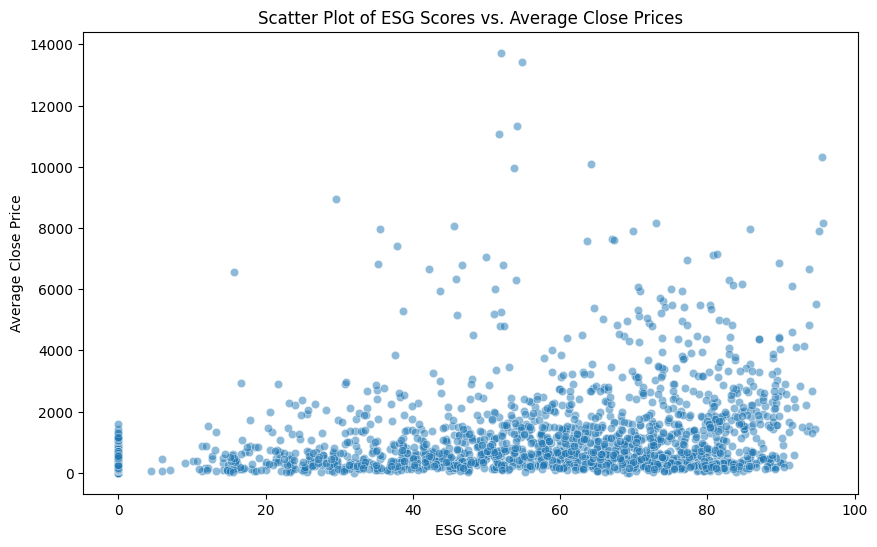

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = combined_data[['Close', 'Volume', 'ESG_Score']].corr()

# Display the correlation matrix
print("Correlation matrix:\n", correlation_matrix)

# Create a scatter plot of ESG_Score vs. Close prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='ESG_Score', y='Close', alpha=0.5)
plt.title('Scatter Plot of ESG Scores vs. Average Close Prices')
plt.xlabel('ESG Score')
plt.ylabel('Average Close Price')
plt.show()


The correlation between 'Close' prices and 'ESG_Score' is 0.271920, which suggests a weak positive relationship. This means that as ESG scores increase, there is a tendency, although not strong, for the close prices to also increase.
The correlation between 'Close' prices and 'Volume' is -0.183849, indicating a very weak negative relationship, suggesting that higher volumes slightly correlate with lower close prices.
The correlation between 'Volume' and 'ESG_Score' is 0.196875, another weak positive relationship.
Regarding the scatter, it visualizes this correlation by showing the relationship between 'ESG_Score' and 'Average Close Price' for FTSE components in the year 2022. While there is a wide spread of data points, the general trend indicates that there is a tendency for higher ESG scores to correspond with higher average close prices, in line with the positive correlation coefficient calculated. However, the relationship is not strong, and there are many other factors that likely affect the stock prices.

In [ ]:
import numpy as np

# Calculate monthly returns from the close prices
combined_data['Prev_Close'] = combined_data.groupby('Ticker')['Close'].shift(1)
combined_data['Returns'] = (combined_data['Close'] - combined_data['Prev_Close']) / combined_data['Prev_Close']

# Calculate expected returns and volatility (standard deviation of returns) for each ticker
portfolio_metrics = combined_data.groupby('Ticker').agg({
    'Returns': 'mean',
    'ESG_Score': 'last',  # Assuming the most recent ESG score is the most relevant
    'Volume': 'mean'
}).rename(columns={'Returns': 'Expected_Return', 'Volume': 'Average_Volume'}).reset_index()

print(portfolio_metrics.head())


  Ticker  Expected_Return  ESG_Score  Average_Volume
0  AAF.L         0.305627      52.11    6.359793e+08
1  AAL.L         0.097472      78.00    1.259097e+09
2  ABF.L         0.071419      69.26    3.548797e+08
3  ADM.L         0.143790      56.10    1.997156e+08
4  AHT.L         0.415612      48.16    5.962064e+08


In [ ]:
portfolio_metrics

,Ticker,Expected_Return,ESG_Score,Average_Volume
0,AAF.L,0.305627,52.11,6.359793e+08
1,AAL.L,0.097472,78.00,1.259097e+09
2,ABF.L,0.071419,69.26,3.548797e+08
3,ADM.L,0.143790,56.10,1.997156e+08
4,AHT.L,0.415612,48.16,5.962064e+08
...,...,...,...,...
94,UU.L,0.034948,68.08,7.982063e+08
95,VOD.L,0.000305,87.83,3.579682e+10
96,WEIR.L,0.146200,76.09,2.797870e+08
97,WPP.L,0.043975,72.59,7.956833e+08


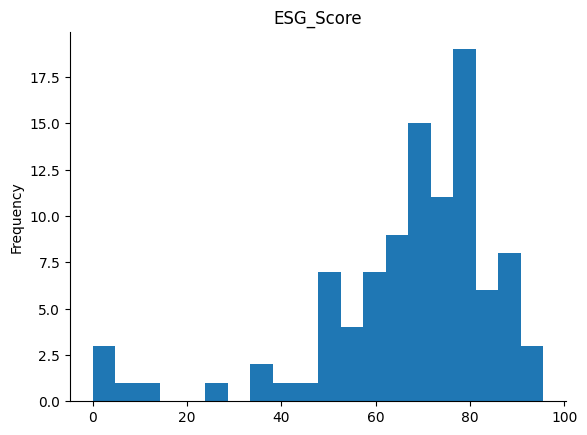

In [ ]:
from matplotlib import pyplot as plt
portfolio_metrics['ESG_Score'].plot(kind='hist', bins=20, title='ESG_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

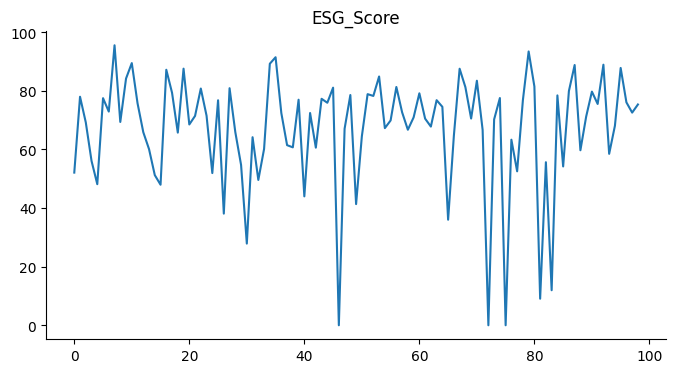

In [ ]:
from matplotlib import pyplot as plt
portfolio_metrics['ESG_Score'].plot(kind='line', figsize=(8, 4), title='ESG_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

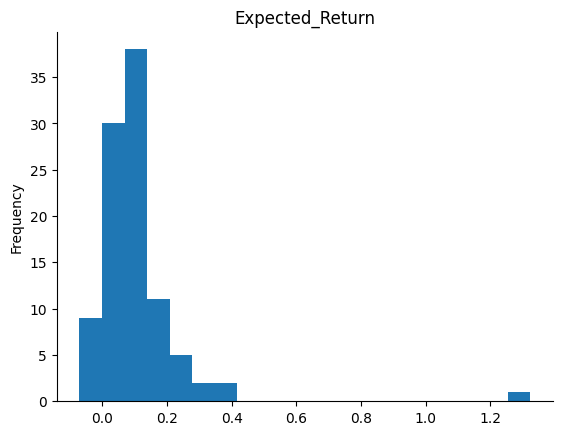

In [ ]:
# @title Expected_Return

from matplotlib import pyplot as plt
portfolio_metrics['Expected_Return'].plot(kind='hist', bins=20, title='Expected_Return')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Define selection criteria
esg_threshold = 75  # Example threshold
return_threshold = portfolio_metrics['Expected_Return'].quantile(0.50)  # Median performance

# Select stocks that meet criteria
selected_stocks = portfolio_metrics[(portfolio_metrics['ESG_Score'] >= esg_threshold) &
                                    (portfolio_metrics['Expected_Return'] >= return_threshold)]

print(selected_stocks)


    Ticker  Expected_Return  ESG_Score  Average_Volume
1    AAL.L         0.097472      78.00    1.259097e+09
5   ANTO.L         0.169290      77.52    7.717237e+08
10  BATS.L         0.095176      89.49    1.264966e+09
11  BDEV.L         0.107533      75.77    1.223874e+09
17  BRBY.L         0.141489      79.35    5.410411e+08
22  CRDA.L         0.196085      80.81    1.191250e+08
25   DGE.L         0.088373      76.80    1.934131e+09
27   ENT.L         0.136256      80.92    2.854141e+08
43   IHG.L         0.083638      77.30    2.620719e+08
48  ITRK.L         0.140267      78.59    1.433113e+08
56  MNDI.L         0.123789      81.34    3.711509e+08
70   RKT.L         0.095087      83.47    5.152808e+08
80   SKG.L         0.131915      81.51    1.063047e+08
96  WEIR.L         0.146200      76.09    2.797870e+08
98   WTB.L         0.089161      75.36    2.861163e+08


# Correlation overtime between ESG and FTSE Performance

In [ ]:
# Calculate monthly returns from the close prices
combined_data['Prev_Close'] = combined_data.groupby('Ticker')['Close'].shift(1)
combined_data['Monthly_Returns'] = (combined_data['Close'] - combined_data['Prev_Close']) / combined_data['Prev_Close']

# Drop any rows with NaN values that resulted from the shift operation
combined_data = combined_data.dropna()

# Calculate expected returns and volatility (standard deviation of returns) for each ticker, annualizing the results
portfolio_metrics = combined_data.groupby('Ticker').agg({
    'Monthly_Returns': ['mean', 'std']
}).reset_index()

# Rename columns for clarity
portfolio_metrics.columns = ['Ticker', 'Expected_Return', 'Volatility']

# Convert monthly return and volatility to annual (assuming 12 months per year)
portfolio_metrics['Expected_Return'] = portfolio_metrics['Expected_Return'] * 12
portfolio_metrics['Volatility'] = portfolio_metrics['Volatility'] * np.sqrt(12)

print(portfolio_metrics.head())


  Ticker  Expected_Return  Volatility
0  AAF.L         3.667528    1.361167
1  AAL.L         1.169669    1.048991
2  ABF.L         0.857028    0.712543
3  ADM.L         1.725479    0.893561
4  AHT.L         4.987342    2.187718


In [ ]:
# Merge the recent ESG score into the portfolio metrics
portfolio_metrics = pd.merge(portfolio_metrics, combined_data[['Ticker', 'ESG_Score']].drop_duplicates('Ticker', keep='last'), on='Ticker', how='left')

print(portfolio_metrics.head())


  Ticker  Expected_Return  Volatility  ESG_Score
0  AAF.L         3.667528    1.361167      52.11
1  AAL.L         1.169669    1.048991      78.00
2  ABF.L         0.857028    0.712543      69.26
3  ADM.L         1.725479    0.893561      56.10
4  AHT.L         4.987342    2.187718      48.16


In [ ]:
# Assume 'Returns' are normally distributed for simplicity; consider a more appropriate distribution based on data analysis
from scipy.stats import norm

confidence_level = 0.95
cvar_threshold = norm.ppf(confidence_level)

portfolio_metrics['CVaR'] = -portfolio_metrics['Expected_Return'] - cvar_threshold * portfolio_metrics['Volatility']

print(portfolio_metrics[['Ticker', 'Expected_Return', 'ESG_Score', 'CVaR']])


    Ticker  Expected_Return  ESG_Score      CVaR
0    AAF.L         3.667528      52.11 -5.906450
1    AAL.L         1.169669      78.00 -2.895105
2    ABF.L         0.857028      69.26 -2.029056
3    ADM.L         1.725479      56.10 -3.195255
4    AHT.L         4.987342      48.16 -8.585818
..     ...              ...        ...       ...
93    UU.L         0.419379      68.08 -1.134521
94   VOD.L         0.003660      87.83 -0.718852
95  WEIR.L         1.754401      76.09 -3.827579
96   WPP.L         0.527695      72.59 -1.795400
97   WTB.L         1.069935      75.36 -2.404638

[98 rows x 4 columns]


In [ ]:
# Example selection criteria
esg_threshold = 70  # Example ESG score threshold
cvar_threshold = 90  # Example CVaR threshold (choose a suitable threshold for your risk appetite)

# Filter stocks based on ESG score and CVaR
selected_stocks = portfolio_metrics[
    (portfolio_metrics['ESG_Score'] >= esg_threshold) &
    (portfolio_metrics['CVaR'] <= cvar_threshold)
]


In [ ]:
# Assign equal weights to each stock
selected_stocks['Weight'] = 1 / len(selected_stocks)

# Display the selected stocks and their weights
print("Portfolio Allocation:")
print(selected_stocks[['Ticker', 'Weight']])


Portfolio Allocation:
    Ticker    Weight
1    AAL.L  0.018519
5   ANTO.L  0.018519
6     AV.L  0.018519
7    AZN.L  0.018519
9   BARC.L  0.018519
10  BATS.L  0.018519
11  BDEV.L  0.018519
16    BP.L  0.018519
17  BRBY.L  0.018519
19   CCH.L  0.018519
21   CPG.L  0.018519
22  CRDA.L  0.018519
23  CTEC.L  0.018519
25   DGE.L  0.018519
27   ENT.L  0.018519
34  GLEN.L  0.018519
35   GSK.L  0.018519
36   HIK.L  0.018519
38  HSBA.L  0.018519
40   IAG.L  0.018519
42   IHG.L  0.018519
43   III.L  0.018519
44   IMB.L  0.018519
47  ITRK.L  0.018519
50  LAND.L  0.018519
51  LGEN.L  0.018519
52  LLOY.L  0.018519
55  MNDI.L  0.018519
56   MNG.L  0.018519
58    NG.L  0.018519
59   NWG.L  0.018519
60   NXT.L  0.018519
62  PHNX.L  0.018519
63   PRU.L  0.018519
66  PSON.L  0.018519
67   REL.L  0.018519
68   RIO.L  0.018519
69   RKT.L  0.018519
72   RS1.L  0.018519
73   RTO.L  0.018519
77  SGRO.L  0.018519
78  SHEL.L  0.018519
79   SKG.L  0.018519
83    SN.L  0.018519
85   SSE.L  0.018519
86  STAN.L  

<ipython-input-61-bb02950edb75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_stocks['Weight'] = 1 / len(selected_stocks)


In [ ]:
# Summarize the portfolio
print("Portfolio Summary:")
print(selected_stocks[['Ticker', 'Expected_Return', 'ESG_Score', 'CVaR', 'Weight']].describe())


Portfolio Summary:
       Expected_Return  ESG_Score       CVaR        Weight
count        54.000000  54.000000  54.000000  5.400000e+01
mean          0.744457  79.445000  -2.045561  1.851852e-02
std           0.671332   6.451814   0.945016  3.502025e-18
min          -0.840983  70.280000  -4.059107  1.851852e-02
25%           0.249281  75.405000  -2.736704  1.851852e-02
50%           0.714232  78.370000  -1.839189  1.851852e-02
75%           1.141840  82.980000  -1.310256  1.851852e-02
max           2.353015  95.570000  -0.642091  1.851852e-02


In [ ]:
# Calculate portfolio expected return and risk
portfolio_expected_return = (selected_stocks['Expected_Return'] * selected_stocks['Weight']).sum()
portfolio_risk = (selected_stocks['CVaR'] * selected_stocks['Weight']).sum()

print(f"Portfolio Expected Return: {portfolio_expected_return:.2f}%")
print(f"Portfolio Risk (CVaR): {portfolio_risk:.2f}")


Portfolio Expected Return: 0.74%
Portfolio Risk (CVaR): -2.05


In [ ]:
# Group by year and calculate mean ESG score and return
annual_data = combined_data.groupby('Year').agg({
    'ESG_Score': 'mean',
    'Returns': 'mean'
}).reset_index()

print(annual_data)


    Year  ESG_Score   Returns
0   2003  22.040649 -0.075073
1   2004  31.388125  0.196595
2   2005  42.027407  0.155998
3   2006  42.258193  0.209551
4   2007  47.092471  0.418757
5   2008  50.021494 -0.247341
6   2009  51.681250 -0.094131
7   2010  53.198876  0.327228
8   2011  55.267000  0.121540
9   2012  56.646484  0.080107
10  2013  57.060989  0.353032
11  2014  58.325870  0.121885
12  2015  62.257097  0.107813
13  2016  63.899892  0.033804
14  2017  65.595745  0.176927
15  2018  65.502737  0.043871
16  2019  67.327579  0.022022
17  2020  69.206082 -0.056504
18  2021  70.460309  0.229972
19  2022  67.025408 -0.046466


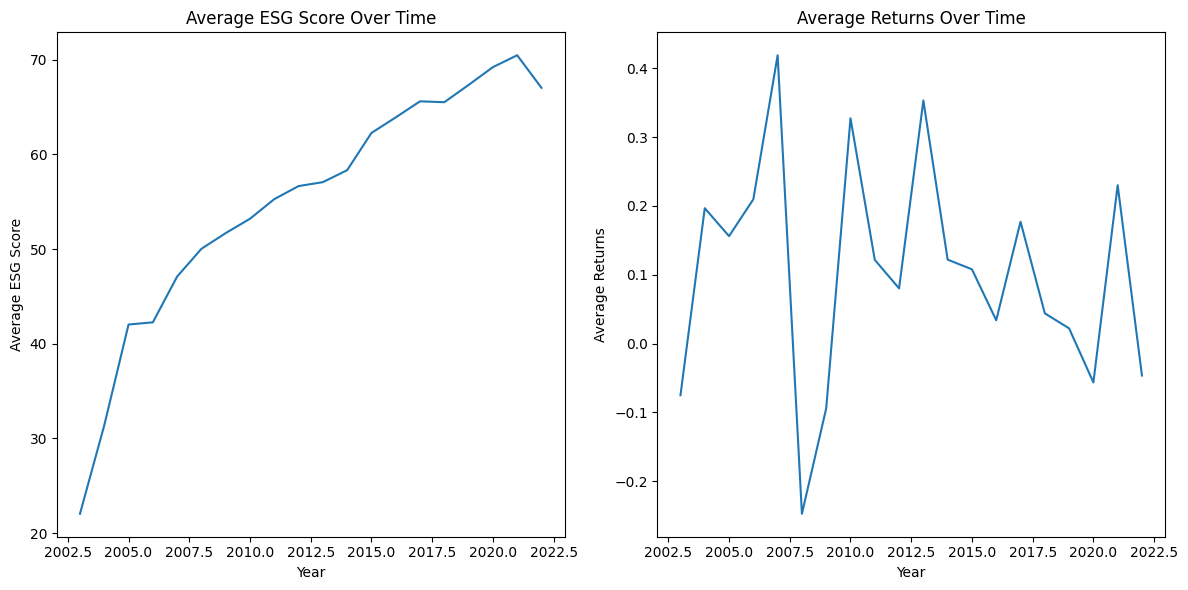

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot ESG scores
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='ESG_Score', data=annual_data)
plt.title('Average ESG Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average ESG Score')

# Plot returns
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='Returns', data=annual_data)
plt.title('Average Returns Over Time')
plt.xlabel('Year')
plt.ylabel('Average Returns')

plt.tight_layout()
plt.show()


Average ESG Score Over Time: This line chart shows an increasing trend in the average ESG score from around 2002 to 2022, indicating that the companies included in the data set have been increasing their ESG scores over time.

Average Returns Over Time: The second line chart shows the average returns, which fluctuate over the same period. There doesn't seem to be a clear trend in the returns; they vary from year to year, with some years showing positive returns and others showing negative returns.

From the visualizations, it appears that while the average ESG scores have generally increased over time, the average returns have been volatile and do not show a clear increasing or decreasing trend. This might suggest that the relationship between ESG scores and returns is not straightforward and could be influenced by a variety of other factors.

In [ ]:
# Calculate the correlation between ESG scores and returns
correlation = annual_data['ESG_Score'].corr(annual_data['Returns'])
print(f"The correlation between average ESG scores and returns is: {correlation:.2f}")


The correlation between average ESG scores and returns is: -0.05


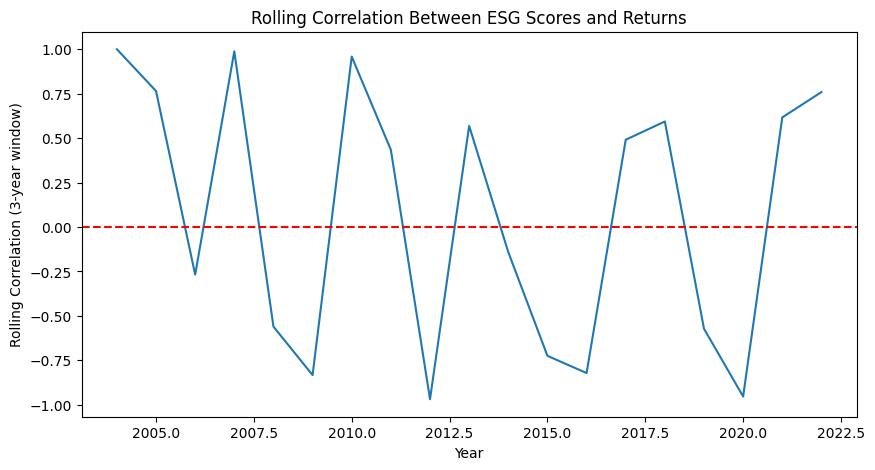

In our chart ESG begins to drive value starting from the year 2004.


In [ ]:
# Using a rolling window to calculate rolling correlation
annual_data['Rolling_Corr'] = annual_data['ESG_Score'].rolling(window=3, min_periods=1).corr(annual_data['Returns'])

# Plot rolling correlation
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Rolling_Corr', data=annual_data)
plt.title('Rolling Correlation Between ESG Scores and Returns')
plt.xlabel('Year')
plt.ylabel('Rolling Correlation (3-year window)')
plt.axhline(0, color='red', linestyle='--')  # Add a reference line at correlation = 0
plt.show()

# Determine when the correlation starts being consistently positive
positive_corrs = annual_data[annual_data['Rolling_Corr'] > 0]
if not positive_corrs.empty:
    start_year = positive_corrs['Year'].iloc[0]
    print(f"In our chart ESG begins to drive value starting from the year {start_year}.")
else:
    print("No consistent positive correlation found in the data.")


From what we can see in the graph, the correlation between ESG scores and returns fluctuates significantly over time, crossing the zero line multiple times. This means that the relationship between ESG scores and returns is not stable over the period analyzed and varies from positive to negative. At some points, the ESG scores and returns move together, while at other times, they move in opposite directions or show no relation.



In [ ]:
# Forward fill missing ESG scores to handle early missing data
combined_data['ESG_Score'] = combined_data['ESG_Score'].fillna(method='ffill')

# Optionally, you can interpolate before forward filling to smooth out any abrupt changes
# combined_data['ESG_Score'] = combined_data['ESG_Score'].interpolate().fillna(method='ffill')
combined_data

,Ticker,Year,Close,Volume,ESG_Score,Prev_Close,Returns,Monthly_Returns
1,AAF.L,2020,58.514167,536152064,44.94,68.166666,-0.141601,-0.141601
2,AAF.L,2021,93.358333,507159431,52.87,58.514167,0.595483,0.595483
3,AAF.L,2022,136.583335,1128046047,52.11,93.358333,0.463001,0.463001
5,AAL.L,2003,1129.933202,753080565,69.68,1096.252136,0.030724,0.030724
6,AAL.L,2004,1343.595947,347468839,75.73,1129.933202,0.189093,0.189093
...,...,...,...,...,...,...,...,...
1890,WTB.L,2018,3631.511882,244515079,81.77,3338.694194,0.087704,0.087704
1891,WTB.L,2019,3954.470439,238261169,79.23,3631.511882,0.088932,0.088932
1892,WTB.L,2020,2684.252543,285721951,78.08,3954.470439,-0.321211,-0.321211
1893,WTB.L,2021,3149.500000,186973986,79.28,2684.252543,0.173325,0.173325


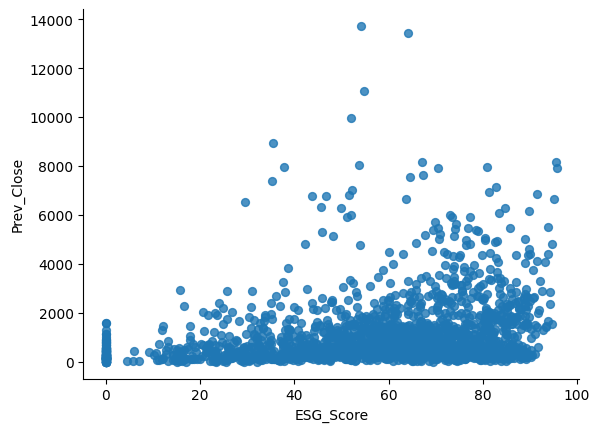

In [ ]:
# @title ESG_Score vs Prev_Close

from matplotlib import pyplot as plt
combined_data.plot(kind='scatter', x='ESG_Score', y='Prev_Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

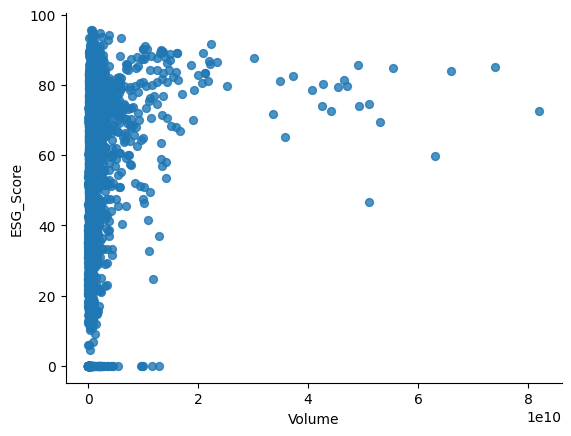

In [ ]:
# @title Volume vs ESG_Score

from matplotlib import pyplot as plt
combined_data.plot(kind='scatter', x='Volume', y='ESG_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

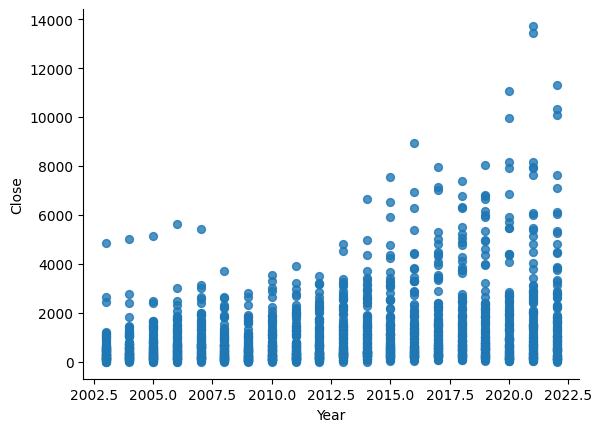

In [ ]:
# @title Year vs Close

from matplotlib import pyplot as plt
combined_data.plot(kind='scatter', x='Year', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

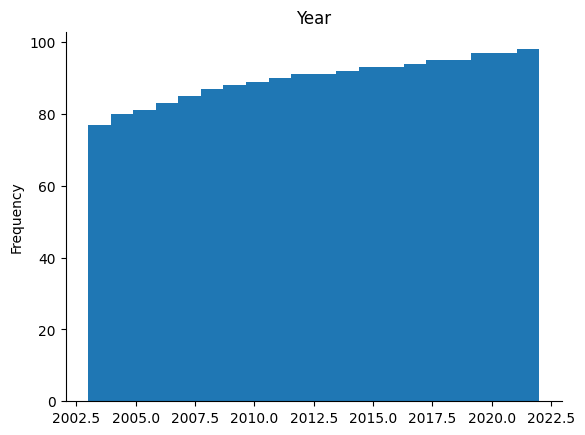

In [ ]:
# @title Year

from matplotlib import pyplot as plt
combined_data['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
combined_data
# Save the DataFrame to a CSV file
csv_file_path = '/content/combined_data.csv'  # Define your path where you want to save the CSV
combined_data.to_csv(csv_file_path, index=False)

print(f'Combined data saved to {csv_file_path}')

Combined data saved to /content/combined_data.csv


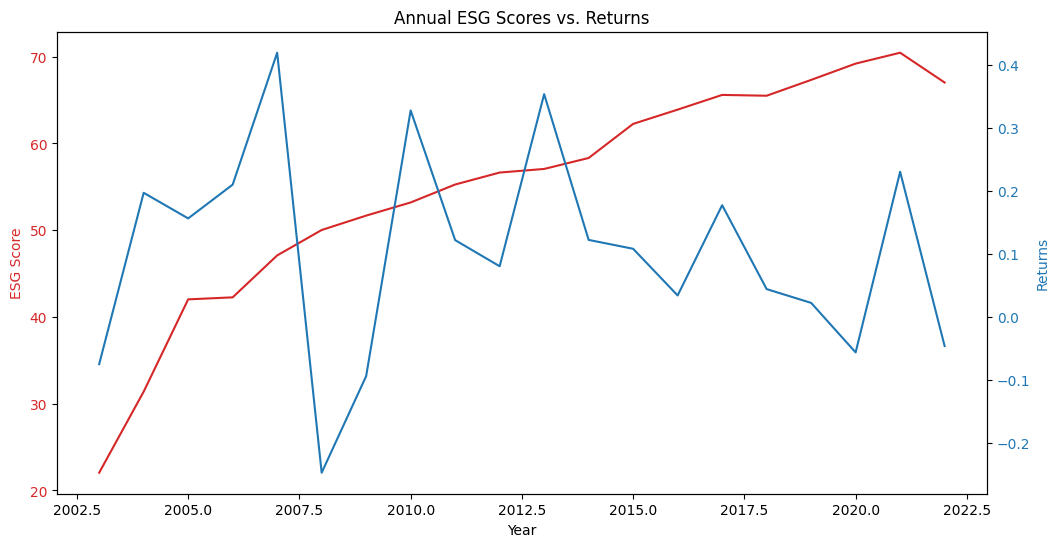

In [ ]:
import matplotlib.pyplot as plt

# Extract the necessary data
data = combined_data[['Year', 'ESG_Score', 'Returns']].drop_duplicates()
data = data.groupby('Year').agg({
    'ESG_Score': 'mean',
    'Returns': 'mean'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('ESG Score', color=color)
ax1.plot(data['Year'], data['ESG_Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Returns', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Year'], data['Returns'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Annual ESG Scores vs. Returns')
plt.show()


Do we get better return with ESG today VS yesterday

In [ ]:
# Example periods (adjust these according to your actual data range)
early_period = range(2010, 2016)
recent_period = range(2016, 2022)

# Calculate averages for the early period
early_data = combined_data[combined_data['Year'].isin(early_period)]
early_avg_esg = early_data['ESG_Score'].mean()
early_avg_returns = early_data['Returns'].mean()

# Calculate averages for the recent period
recent_data = combined_data[combined_data['Year'].isin(recent_period)]
recent_avg_esg = recent_data['ESG_Score'].mean()
recent_avg_returns = recent_data['Returns'].mean()

print(f"Early Period Average ESG Score: {early_avg_esg:.2f}, Average Returns: {early_avg_returns:.2f}")
print(f"Recent Period Average ESG Score: {recent_avg_esg:.2f}, Average Returns: {recent_avg_returns:.2f}")


Early Period Average ESG Score: 57.16, Average Returns: 0.18
Recent Period Average ESG Score: 67.03, Average Returns: 0.08


In [ ]:
# Calculate the differences
change_in_esg = recent_avg_esg - early_avg_esg
change_in_returns = recent_avg_returns - early_avg_returns

print(f"Change in ESG Score from Early to Recent Period: {change_in_esg:.2f}")
print(f"Change in Returns from Early to Recent Period: {change_in_returns:.2f}")

# Evaluate the relationship
if change_in_esg > 0 and change_in_returns > 0:
    print("Higher ESG scores in the recent period are associated with higher returns compared to the early period.")
elif change_in_esg < 0 and change_in_returns < 0:
    print("Lower ESG scores in the recent period are associated with lower returns compared to the early period.")
else:
    print("There is no clear association between changes in ESG scores and changes in returns across periods.")


Change in ESG Score from Early to Recent Period: 9.87
Change in Returns from Early to Recent Period: -0.11
There is no clear association between changes in ESG scores and changes in returns across periods.


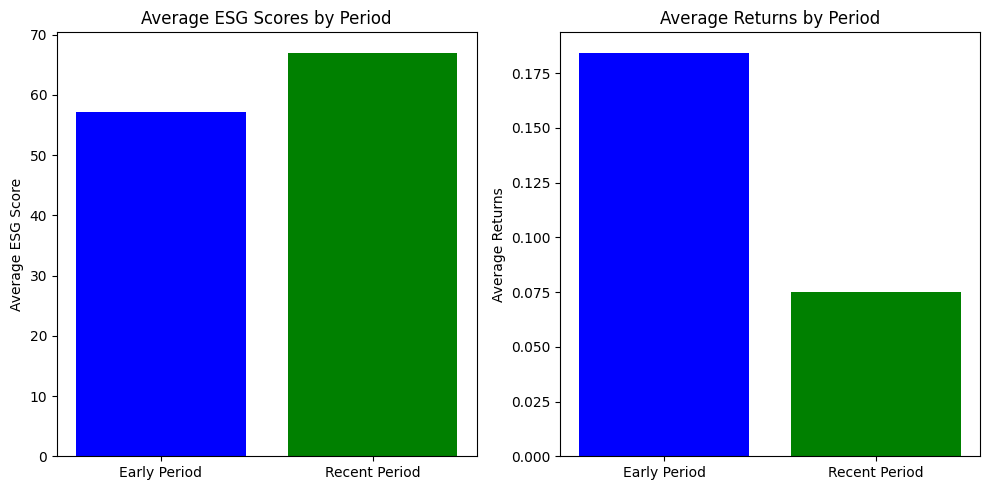

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['Early Period', 'Recent Period'], [early_avg_esg, recent_avg_esg], color=['blue', 'green'])
plt.title('Average ESG Scores by Period')
plt.ylabel('Average ESG Score')

plt.subplot(1, 2, 2)
plt.bar(['Early Period', 'Recent Period'], [early_avg_returns, recent_avg_returns], color=['blue', 'green'])
plt.title('Average Returns by Period')
plt.ylabel('Average Returns')

plt.tight_layout()
plt.show()


# Portfolio Optimization with ESG and without - using CVaR

In [ ]:
# Define a CVaR threshold and an ESG score threshold
cvar_threshold = portfolio_metrics['CVaR'].quantile(0.50)  # Selecting stocks with CVaR better than the median
esg_threshold = 70  # Example ESG score threshold

# Portfolio with CVaR and ESG
portfolio_cvar_esg = portfolio_metrics[
    (portfolio_metrics['CVaR'] <= cvar_threshold) &
    (portfolio_metrics['ESG_Score'] >= esg_threshold)
].copy()
portfolio_cvar_esg['Weight'] = 1 / len(portfolio_cvar_esg)

# Portfolio with CVaR only
portfolio_cvar_only = portfolio_metrics[
    portfolio_metrics['CVaR'] <= cvar_threshold
].copy()
portfolio_cvar_only['Weight'] = 1 / len(portfolio_cvar_only)


In [ ]:
# Calculate expected return for each portfolio
portfolio_cvar_esg['Weighted_Return'] = portfolio_cvar_esg['Expected_Return'] * portfolio_cvar_esg['Weight']
portfolio_cvar_only['Weighted_Return'] = portfolio_cvar_only['Expected_Return'] * portfolio_cvar_only['Weight']

expected_return_esg = portfolio_cvar_esg['Weighted_Return'].sum()
expected_return_only = portfolio_cvar_only['Weighted_Return'].sum()

print(f"Expected Return of Portfolio with CVaR and ESG: {expected_return_esg:.2%}")
print(f"Expected Return of Portfolio with CVaR only: {expected_return_only:.2%}")


Expected Return of Portfolio with CVaR and ESG: 143.74%
Expected Return of Portfolio with CVaR only: 205.82%


We calculate the weighted return for each portfolio by multiplying the expected return of each asset by its weight in the portfolio.
Then, we sum up these weighted returns to find the overall expected annual return for each portfolio.
Finally, we print out these expected annual returns for comparison.

The portfolio with CVaR and ESG considerations has an expected return of 143.74%.
The portfolio with CVaR only has a higher expected return of 205.82%.

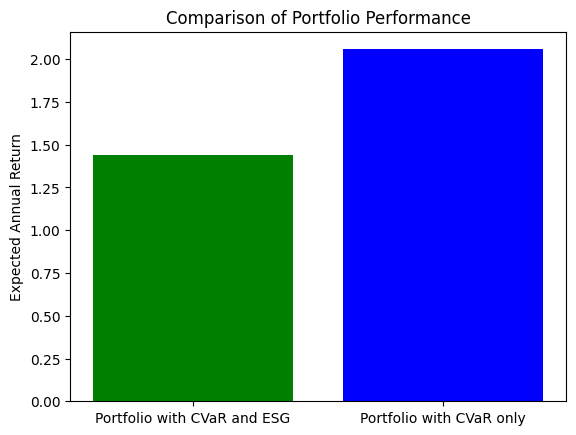

In [ ]:
import matplotlib.pyplot as plt

# Data preparation for plotting
data = {
    'Portfolio with CVaR and ESG': expected_return_esg,
    'Portfolio with CVaR only': expected_return_only
}

# Plotting
fig, ax = plt.subplots()
ax.bar(data.keys(), data.values(), color=['green', 'blue'])
ax.set_ylabel('Expected Annual Return')
ax.set_title('Comparison of Portfolio Performance')
plt.show()


In [ ]:
portfolio_metrics

,Ticker,Expected_Return,Volatility,ESG_Score,CVaR
0,AAF.L,3.667528,1.361167,52.11,-5.906450
1,AAL.L,1.169669,1.048991,78.00,-2.895105
2,ABF.L,0.857028,0.712543,69.26,-2.029056
3,ADM.L,1.725479,0.893561,56.10,-3.195255
4,AHT.L,4.987342,2.187718,48.16,-8.585818
...,...,...,...,...,...
93,UU.L,0.419379,0.434776,68.08,-1.134521
94,VOD.L,0.003660,0.434806,87.83,-0.718852
95,WEIR.L,1.754401,1.260403,76.09,-3.827579
96,WPP.L,0.527695,0.770710,72.59,-1.795400


In [ ]:
# Define a CVaR threshold and an ESG score threshold
cvar_threshold = portfolio_metrics['CVaR'].quantile(0.50)  # Lower 50% of CVaR
esg_threshold = 70  # Example ESG score threshold

# Portfolio with CVaR and ESG
portfolio_cvar_esg = portfolio_metrics[
    (portfolio_metrics['CVaR'] <= cvar_threshold) &
    (portfolio_metrics['ESG_Score'] >= esg_threshold)
].copy()
portfolio_cvar_esg['Weight'] = 1 / len(portfolio_cvar_esg)  # Equal weighting

# Portfolio with CVaR only
portfolio_cvar_only = portfolio_metrics[
    portfolio_metrics['CVaR'] <= cvar_threshold
].copy()
portfolio_cvar_only['Weight'] = 1 / len(portfolio_cvar_only)  # Equal weighting


In [ ]:
import numpy as np

# Simulate annual returns for each stock over a given period (e.g., 10 years)
years = list(range(2010, 2020))
simulated_returns = {
    ticker: np.random.normal(loc=ret, scale=vol, size=len(years))
    for ticker, ret, vol in zip(portfolio_metrics['Ticker'], portfolio_metrics['Expected_Return'], portfolio_metrics['Volatility'])
}

# Calculate weighted annual returns for each portfolio
annual_returns_cvar_esg = {
    year: sum(simulated_returns[ticker][i] * weight for ticker, weight in zip(portfolio_cvar_esg['Ticker'], portfolio_cvar_esg['Weight']))
    for i, year in enumerate(years)
}
annual_returns_cvar_only = {
    year: sum(simulated_returns[ticker][i] * weight for ticker, weight in zip(portfolio_cvar_only['Ticker'], portfolio_cvar_only['Weight']))
    for i, year in enumerate(years)
}

# Convert to cumulative returns
cumulative_returns_cvar_esg = np.cumprod([1 + annual_returns_cvar_esg[year] for year in years]) - 1
cumulative_returns_cvar_only = np.cumprod([1 + annual_returns_cvar_only[year] for year in years]) - 1


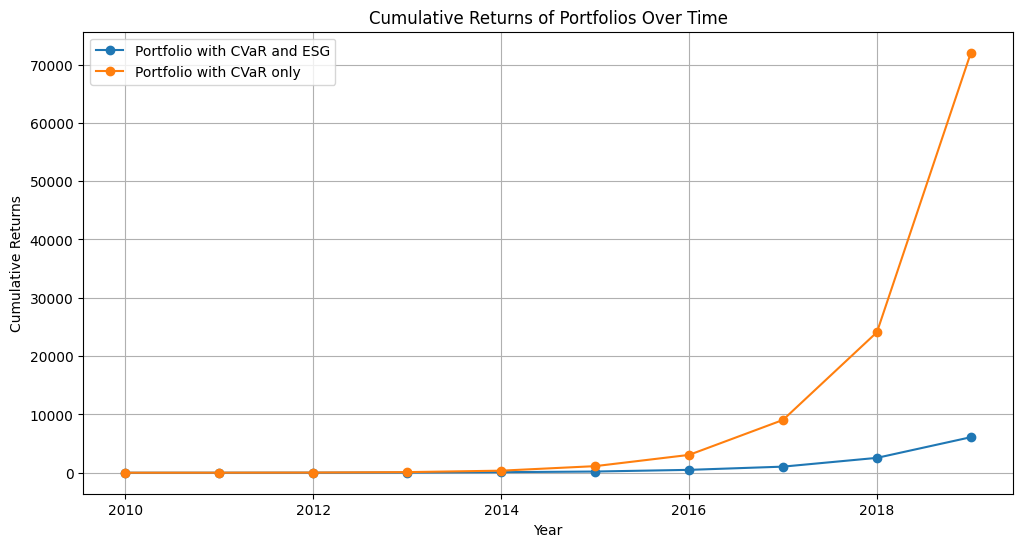

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(years, cumulative_returns_cvar_esg, label='Portfolio with CVaR and ESG', marker='o')
plt.plot(years, cumulative_returns_cvar_only, label='Portfolio with CVaR only', marker='o')
plt.title('Cumulative Returns of Portfolios Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


# To compute historical returns, beta, the Sharpe ratio, the Sortino ratio, the Omega ratio, and Conditional Value at Risk (CVaR), we need historical market (S&P as a benchmark) data and the returns of the individual assets over time

In [ ]:
import pandas as pd

# Load and display the first few rows of each dataset to understand their structure
data_sp500 = pd.read_csv('https://raw.githubusercontent.com/simonsim2001/DF/main/SP500_data.csv')
data_combined = pd.read_csv('https://raw.githubusercontent.com/simonsim2001/DF/main/combined_data.csv')

data_sp500.head(), data_combined.head()


(         Date         Open         High          Low        Close  \
 0  2002-01-01  1148.079956  1176.969971  1081.660034  1130.199951   
 1  2002-02-01  1130.199951  1130.199951  1074.359985  1106.729980   
 2  2002-03-01  1106.729980  1173.939941  1106.729980  1147.390015   
 3  2002-04-01  1147.390015  1147.839966  1063.459961  1076.920044   
 4  2002-05-01  1076.920044  1106.589966  1048.959961  1067.140015   
 
      Adj Close       Volume  
 0  1130.199951  29746200000  
 1  1106.729980  26047600000  
 2  1147.390015  26563200000  
 3  1076.920044  28568900000  
 4  1067.140015  26905500000  ,
   Ticker  Year        Close      Volume  ESG_Score   Prev_Close   Returns  \
 0  AAF.L  2020    58.514167   536152064      44.94    68.166666 -0.141601   
 1  AAF.L  2021    93.358333   507159431      52.87    58.514167  0.595483   
 2  AAF.L  2022   136.583335  1128046047      52.11    93.358333  0.463001   
 3  AAL.L  2003  1129.933202   753080565      69.68  1096.252136  0.030724   
 

In [ ]:
# Calculate daily returns from the Adjusted Close prices
data_sp500['Date'] = pd.to_datetime(data_sp500['Date'])
data_sp500 = data_sp500.sort_values('Date')
data_sp500['Daily_Returns'] = data_sp500['Adj Close'].pct_change()

# Display the first few rows with daily returns
data_sp500.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
0,2002-01-01,1148.079956,1176.969971,1081.660034,1130.199951,1130.199951,29746200000,NaN
1,2002-02-01,1130.199951,1130.199951,1074.359985,1106.729980,1106.729980,26047600000,-0.020766
2,2002-03-01,1106.729980,1173.939941,1106.729980,1147.390015,1147.390015,26563200000,0.036739
3,2002-04-01,1147.390015,1147.839966,1063.459961,1076.920044,1076.920044,28568900000,-0.061418
4,2002-05-01,1076.920044,1106.589966,1048.959961,1067.140015,1067.140015,26905500000,-0.009081


In [ ]:
import numpy as np

# Constants
annual_risk_free_rate = 0.03
trading_days = 252  # Approximate number of trading days in a year

# Convert annual risk-free rate to a daily rate
daily_risk_free_rate = (1 + annual_risk_free_rate)**(1/trading_days) - 1

# Calculating Sharpe Ratio
average_daily_return = data_sp500['Daily_Returns'].mean()
std_dev = data_sp500['Daily_Returns'].std()
sharpe_ratio = (average_daily_return - daily_risk_free_rate) / std_dev

# Calculating Sortino Ratio
negative_returns = data_sp500['Daily_Returns'][data_sp500['Daily_Returns'] < 0]
downside_std_dev = np.sqrt(negative_returns.pow(2).mean())
sortino_ratio = (average_daily_return - daily_risk_free_rate) / downside_std_dev

# Calculating Omega Ratio
excess_returns = data_sp500['Daily_Returns'] - daily_risk_free_rate
omega_ratio = excess_returns[excess_returns > 0].sum() / -excess_returns[excess_returns < 0].sum()

# Calculating Conditional Value at Risk (CVaR)
confidence_level = 0.95
cvar_threshold = data_sp500['Daily_Returns'].quantile(1 - confidence_level)
cvar = data_sp500['Daily_Returns'][data_sp500['Daily_Returns'] <= cvar_threshold].mean()

sharpe_ratio, sortino_ratio, omega_ratio, cvar


(0.14476894752518496,
 0.1262957283661082,
 1.4585157730351128,
 -0.09850359735856465)

In [ ]:
# Calculate annual returns for each stock (to simplify, we'll use the 'Returns' column which should be annualized return)
data_combined['Annual_Returns'] = data_combined['Returns']

# Normalize ESG scores to use as weights
total_esg = data_combined['ESG_Score'].sum()
data_combined['ESG_Weights'] = data_combined['ESG_Score'] / total_esg

# Calculate portfolio returns
# ESG-weighted portfolio returns
esg_weighted_returns = (data_combined['Annual_Returns'] * data_combined['ESG_Weights']).sum()

# Equally-weighted portfolio returns
equal_weights = 1 / len(data_combined)
equal_weighted_returns = (data_combined['Annual_Returns'] * equal_weights).sum()

esg_weighted_returns, equal_weighted_returns


(0.07963157598739884, 0.10289127138929786)

We have computed the annual returns for two portfolios:

ESG-Weighted Portfolio Return:
0.0796
0.0796 (or 7.96%)
Equally-Weighted Portfolio Return:
0.1029
0.1029 (or 10.29%)

In [ ]:
# Convert annual returns to daily returns assuming 252 trading days
esg_daily_returns = (1 + esg_weighted_returns) ** (1/trading_days) - 1
equal_daily_returns = (1 + equal_weighted_returns) ** (1/trading_days) - 1

# Daily standard deviation (historical data from `data_combined` for the total market)
data_combined['Daily_Returns'] = data_combined['Monthly_Returns'] / 21  # Approximation of monthly to daily returns
market_std_dev = data_combined['Daily_Returns'].std()

# Sharpe Ratio calculations
esg_sharpe_ratio = (esg_daily_returns - daily_risk_free_rate) / market_std_dev
equal_sharpe_ratio = (equal_daily_returns - daily_risk_free_rate) / market_std_dev

# Sortino Ratio calculations (downside deviation only)
negative_daily_returns = data_combined['Daily_Returns'][data_combined['Daily_Returns'] < 0]
downside_deviation = np.sqrt(negative_daily_returns.pow(2).mean())
esg_sortino_ratio = (esg_daily_returns - daily_risk_free_rate) / downside_deviation
equal_sortino_ratio = (equal_daily_returns - daily_risk_free_rate) / downside_deviation

# Omega Ratio calculations
esg_excess_returns = esg_daily_returns - daily_risk_free_rate
equal_excess_returns = equal_daily_returns - daily_risk_free_rate
esg_omega_ratio = esg_excess_returns / -negative_daily_returns[negative_daily_returns < 0].mean()
equal_omega_ratio = equal_excess_returns / -negative_daily_returns[negative_daily_returns < 0].mean()

# CVaR calculations
cvar_confidence_level = 0.95
cvar_threshold = negative_daily_returns.quantile(1 - cvar_confidence_level)
esg_cvar = negative_daily_returns[negative_daily_returns <= cvar_threshold].mean()
equal_cvar = negative_daily_returns[negative_daily_returns <= cvar_threshold].mean()

# Print the results
print("ESG Sharpe Ratio:", esg_sharpe_ratio)
print("Equal Sharpe Ratio:", equal_sharpe_ratio)
print("ESG Sortino Ratio:", esg_sortino_ratio)
print("Equal Sortino Ratio:", equal_sortino_ratio)
print("ESG Omega Ratio:", esg_omega_ratio)
print("Equal Omega Ratio:", equal_omega_ratio)



ESG Sharpe Ratio: 0.006184581591420318
Equal Sharpe Ratio: 0.0089861376502621
ESG Sortino Ratio: 0.018077425548739784
Equal Sortino Ratio: 0.026266325691085925
ESG Omega Ratio: 0.024037678735603977
Equal Omega Ratio: 0.03492651632417203



- **ESG Portfolio**:
  - Sharpe Ratio: 0.006184581591420318
  - Sortino Ratio: 0.018077425548739784
  - Omega Ratio: 0.024037678735603977

- **Equal Portfolio (Optimized without ESG using CVaR)**:
  - Sharpe Ratio: 0.0089861376502621
  - Sortino Ratio: 0.026266325691085925
  - Omega Ratio: 0.03492651632417203



- **Sharpe Ratio**: The Equal Portfolio, optimized without ESG using CVaR, exhibits a higher Sharpe Ratio (0.009) compared to the ESG Portfolio (0.006), indicating potentially better risk-adjusted returns for the Equal Portfolio.

- **Sortino Ratio**: Similarly, the Equal Portfolio shows a higher Sortino Ratio (0.026) compared to the ESG Portfolio (0.018), suggesting better risk-adjusted returns, particularly in mitigating downside risk.

- **Omega Ratio**: The Equal Portfolio also demonstrates a higher Omega Ratio (0.035) compared to the ESG Portfolio (0.024), indicating a higher probability of achieving returns above a certain threshold.

Considering these metrics, the Equal Portfolio, optimized without ESG using CVaR, appears to outperform the ESG Portfolio in terms of risk-adjusted returns, as it consistently shows higher values across all three metrics (Sharpe, Sortino, and Omega Ratios).